<a href="https://colab.research.google.com/github/vinal-2/CMU-CERT-r6.2/blob/main/ML%20notebooks/Anomaly_Detection_Insider_Threat_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import os

def get_csv_files_recursive(directory_path, exclude_dirs=[]):
    csv_files = []
    for root, dirs, files in os.walk(directory_path):
        # Exclude specific directories
        dirs[:] = [d for d in dirs if d not in exclude_dirs]

        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))
    return csv_files

directory_path = "/content/drive/MyDrive/r6.2"  # Replace with the actual directory path
exclude_dirs = [""]  # Add any directories you want to exclude here
csv_files = get_csv_files_recursive(directory_path, exclude_dirs)

In [ ]:
files = []
names = []
i = 0
print("✔ All CSV files in the directory.")
for csv_file in csv_files:
  if i>6:
    print(f'\t✅ Employees Data - {csv_file.split("/")[-1]}')
  else:
    print(f'\t✅ {csv_file.split("/")[-1]}')
  files.append(csv_file)
  names.append(csv_file.split("/")[-1])
  i+=1

✔ All CSV files in the directory.
	✅ psychometric.csv
	✅ logon.csv
	✅ decoy_file.csv
	✅ device.csv
	✅ email.csv
	✅ file.csv
	✅ http.csv
	✅ Employees Data - 2009-12.csv
	✅ Employees Data - 2010-01.csv
	✅ Employees Data - 2010-02.csv
	✅ Employees Data - 2010-03.csv
	✅ Employees Data - 2010-04.csv
	✅ Employees Data - 2010-05.csv
	✅ Employees Data - 2010-06.csv
	✅ Employees Data - 2010-07.csv
	✅ Employees Data - 2010-08.csv
	✅ Employees Data - 2010-09.csv
	✅ Employees Data - 2010-10.csv
	✅ Employees Data - 2010-11.csv
	✅ Employees Data - 2010-12.csv
	✅ Employees Data - 2011-01.csv
	✅ Employees Data - 2011-02.csv
	✅ Employees Data - 2011-03.csv
	✅ Employees Data - 2011-04.csv
	✅ Employees Data - 2011-05.csv


In [ ]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm.auto import tqdm
from tabulate import tabulate

pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nrows = 500000
df_psychometric = pd.read_csv(files[0], low_memory=True, nrows=nrows)
df_logon = pd.read_csv(files[1], low_memory=True, nrows=nrows)
df_decoy_file = pd.read_csv(files[2], low_memory=True)
df_device = pd.read_csv(files[3], low_memory=True, nrows=nrows)
df_email = pd.read_csv(files[4], low_memory=True, nrows=nrows)
df_file = pd.read_csv(files[5], low_memory=True, nrows=nrows)
df_http = pd.read_csv(files[6], low_memory=True, nrows=nrows)
df_user = pd.read_csv(files[7], nrows=nrows)

In [ ]:
datasets = [df_psychometric, df_logon, df_decoy_file, df_device,
            df_email, df_file, df_http, df_user]

for i in range(len(datasets)):
  print(f"✔{names[i]}\n✓Dataset Shape: {datasets[i].shape}\n✓Columns:\
   {datasets[i].columns.tolist()}\n✓Null values exist: {datasets[i].isnull().values.any()}\n")

✔psychometric.csv
✓Dataset Shape: (4000, 7)
✓Columns:   ['employee_name', 'user_id', 'O', 'C', 'E', 'A', 'N']
✓Null values exist: False

✔logon.csv
✓Dataset Shape: (500000, 5)
✓Columns:   ['id', 'date', 'user', 'pc', 'activity']
✓Null values exist: False

✔decoy_file.csv
✓Dataset Shape: (31095, 2)
✓Columns:   ['decoy_filename', 'pc']
✓Null values exist: False

✔device.csv
✓Dataset Shape: (500000, 6)
✓Columns:   ['id', 'date', 'user', 'pc', 'file_tree', 'activity']
✓Null values exist: True

✔email.csv
✓Dataset Shape: (500000, 12)
✓Columns:   ['id', 'date', 'user', 'pc', 'to', 'cc', 'bcc', 'from', 'activity', 'size', 'attachments', 'content']
✓Null values exist: True

✔file.csv
✓Dataset Shape: (500000, 9)
✓Columns:   ['id', 'date', 'user', 'pc', 'filename', 'activity', 'to_removable_media', 'from_removable_media', 'content']
✓Null values exist: False

✔http.csv
✓Dataset Shape: (500000, 7)
✓Columns:   ['id', 'date', 'user', 'pc', 'url', 'activity', 'content']
✓Null values exist: False

✔2

In [ ]:
# List of DataFrames and their corresponding names
print("Check Columns Inside the DataFrames.")

# print the column names in each dataset
for name, dataframe in zip(names, datasets):
    print(f"{name} columns:")
    for column in dataframe.columns:
        print(f" - {column}")
    print()

Check Columns Inside the DataFrames.
psychometric.csv columns:
 - employee_name
 - user_id
 - O
 - C
 - E
 - A
 - N

logon.csv columns:
 - id
 - date
 - user
 - pc
 - activity

decoy_file.csv columns:
 - decoy_filename
 - pc

device.csv columns:
 - id
 - date
 - user
 - pc
 - file_tree
 - activity

email.csv columns:
 - id
 - date
 - user
 - pc
 - to
 - cc
 - bcc
 - from
 - activity
 - size
 - attachments
 - content

file.csv columns:
 - id
 - date
 - user
 - pc
 - filename
 - activity
 - to_removable_media
 - from_removable_media
 - content

http.csv columns:
 - id
 - date
 - user
 - pc
 - url
 - activity
 - content

2009-12.csv columns:
 - employee_name
 - user_id
 - email
 - role
 - projects
 - business_unit
 - functional_unit
 - department
 - team
 - supervisor



In [ ]:
# print the shape of each dataset
for name, df in zip(names, datasets):
    print(f"Shape of {name}:\t\t {df.shape}")

Shape of psychometric.csv:		 (4000, 7)
Shape of logon.csv:		 (500000, 5)
Shape of decoy_file.csv:		 (31095, 2)
Shape of device.csv:		 (500000, 6)
Shape of email.csv:		 (500000, 12)
Shape of file.csv:		 (500000, 9)
Shape of http.csv:		 (500000, 7)
Shape of 2009-12.csv:		 (4000, 10)


In [ ]:
# convert the date field into datetime
df_logon['date'] = pd.to_datetime(df_logon['date'])
df_http['date'] = pd.to_datetime(df_http['date'])
df_file['date'] = pd.to_datetime(df_file['date'])
df_device['date'] = pd.to_datetime(df_device['date'])
df_email['date'] = pd.to_datetime(df_email['date'])

In [ ]:
def print_min_max_dates(df):
  # Extract the maximum and minimum dates
  max_date = df['date'].max()
  min_date = df['date'].min()

  # Print the year and month names of the maximum and minimum dates
  print(f">>Minimum Date: {min_date.strftime('%Y-%m-%d')} ({min_date.strftime('%B %Y')})")
  print(f">>Maximum Date: {max_date.strftime('%Y-%m-%d')} ({max_date.strftime('%B %Y')})")

In [ ]:
# show the min and max dates of each dataset.
for name, dataframe in zip(['logon.csv', 'device.csv', 'email.csv', 'file.csv', 'http.csv'], [df_logon, df_device,
            df_email, df_file, df_http]):
    print("="*100)
    print(f"\t\t\tDataset {name}")
    print("="*100)
    print()
    print_min_max_dates(dataframe)
    print()

			Dataset logon.csv

>>Minimum Date: 2010-01-02 (January 2010)
>>Maximum Date: 2010-03-11 (March 2010)

			Dataset device.csv

>>Minimum Date: 2010-01-02 (January 2010)
>>Maximum Date: 2010-06-08 (June 2010)

			Dataset email.csv

>>Minimum Date: 2010-01-02 (January 2010)
>>Maximum Date: 2010-01-25 (January 2010)

			Dataset file.csv

>>Minimum Date: 2010-01-02 (January 2010)
>>Maximum Date: 2010-05-01 (May 2010)

			Dataset http.csv

>>Minimum Date: 2010-01-02 (January 2010)
>>Maximum Date: 2010-01-05 (January 2010)



# **User Data**

In [ ]:
df_user.head()

employee_name  user_id                              email  \
0  Nicholas Fletcher Pruitt  NFP2441  Nicholas.Fletcher.Pruitt@dtaa.com   
1     Abraham Dante Rodgers  ADR1517     Abraham.Dante.Rodgers@dtaa.com   
2     Medge Wilma Blackburn  MWB4000     Medge.Wilma.Blackburn@dtaa.com   
3     Meghan Laurel Salazar  MLS2856     Meghan.Laurel.Salazar@dtaa.com   
4          Beau Todd Romero  BTR2026          Beau.Todd.Romero@dtaa.com   

                   role projects  business_unit  \
0               ITAdmin      NaN              1   
1  ProductionLineWorker      NaN              1   
2  ProductionLineWorker      NaN              1   
3  ProductionLineWorker      NaN              1   
4    MechanicalEngineer      NaN              1   

                                  functional_unit       department  \
0                               1 - Adminstration     5 - Security   
1                    5 - Manufacturing_Commercial     3 - Assembly   
2                    6 - Manufacturing_Government     3 - Assembly   
3                    6 - Manufacturing_Government     3 - Assembly   
4  3 - ResearchAndEngineering_Government_Domestic  4 - Engineering   

                      team                supervisor  
0   8 - ElectronicSecurity   Madison Charissa Malone  
1         4 - AssemblyDept        Mark William Horne  
2        14 - AssemblyDept    Hillary Zenaida Adkins  
3         8 - AssemblyDept    Demetria Sage Melendez  
4  16 - TestAndEvalualtion  Elijah Valentine Fuentes

In [ ]:
# only get revelent features
df_user = df_user[["user_id", "functional_unit", "department"]]
df_user.head()

user_id                                 functional_unit       department
0  NFP2441                               1 - Adminstration     5 - Security
1  ADR1517                    5 - Manufacturing_Commercial     3 - Assembly
2  MWB4000                    6 - Manufacturing_Government     3 - Assembly
3  MLS2856                    6 - Manufacturing_Government     3 - Assembly
4  BTR2026  3 - ResearchAndEngineering_Government_Domestic  4 - Engineering

In [ ]:
def plot_distribution(df, col):
  # Calculate value counts of 'functional_unit'
  value_counts = df[col].value_counts()

  # Plot the value counts as a bar plot
  plt.figure(figsize=(8, 6))
  ax = value_counts.plot(kind='bar', color='skyblue')
  plt.title(f"Value Counts of '{col}'")
  plt.xlabel(f"{col}")
  plt.ylabel("Count")
  plt.xticks(rotation=90)

  # Display count values on top of each bar
  for idx, count in enumerate(value_counts):
      ax.text(idx, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

  plt.show()

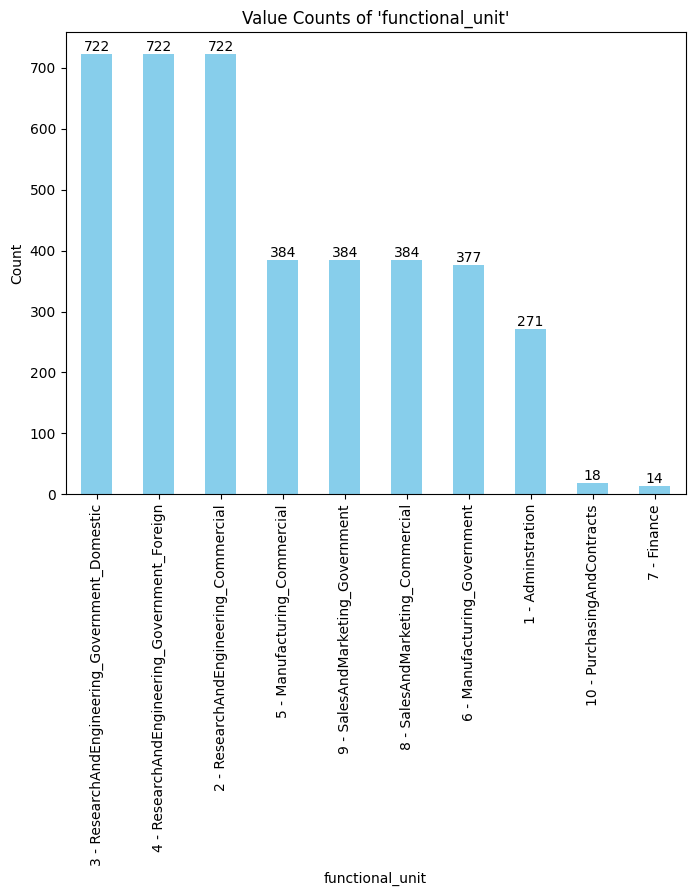

In [ ]:
plot_distribution(df_user, 'functional_unit')

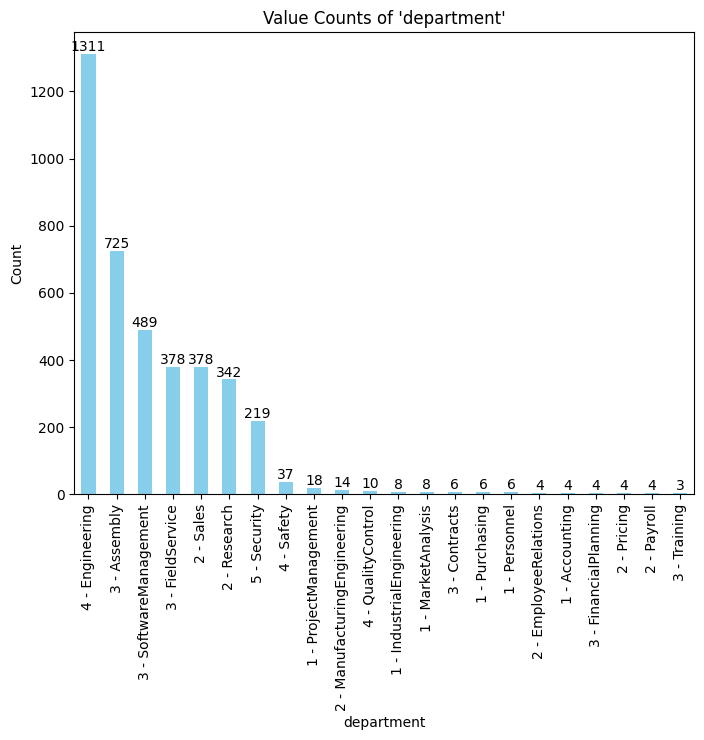

In [ ]:
plot_distribution(df_user, 'department')

In [ ]:
# we get the functional_unit is ResearchAndEngineering_Government_Domestic in which get the
# Engineering and SoftwareManagement department
df_user_ = df_user[df_user['functional_unit']=='3 - ResearchAndEngineering_Government_Domestic']
df_user_ = df_user_[df_user_['department'].isin(['4 - Engineering', '3 - SoftwareManagement'])]
df_user_ = df_user_.dropna(axis = 0) # drop null values
print(df_user_.shape);df_user_.info()

(600, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 4 to 3997
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          600 non-null    object
 1   functional_unit  600 non-null    object
 2   department       600 non-null    object
dtypes: object(3)
memory usage: 18.8+ KB


In [ ]:
df_device.head()

id                date     user       pc  \
0  {Z2Q8-K3AV28BE-9353JIRT} 2010-01-02 07:17:18  SDH2394  PC-5849   
1  {C7F1-G7LE60RU-2483DAXS} 2010-01-02 07:22:42  JKS2444  PC-6961   
2  {T9A4-D4RV69OF-1704NINW} 2010-01-02 07:31:42  CBA1023  PC-1570   
3  {S8L0-O6QQ15NL-0636OYNV} 2010-01-02 07:33:28  GNT0221  PC-6427   
4  {U0F1-R1FX27FM-6954TTVU} 2010-01-02 07:33:55  JKS2444  PC-6961   

                                           file_tree    activity  
0                          R:\;R:\22B5gX4;R:\SDH2394     Connect  
1                                     R:\;R:\JKS2444     Connect  
2  R:\;R:\42gY283;R:\48rr4y2;R:\59ntt61;R:\76xCQG...     Connect  
3                                     R:\;R:\GNT0221     Connect  
4                                                NaN  Disconnect

# **EDA on Logon Dataset**

In [ ]:
df_user_.head(2)

user_id                                 functional_unit       department
4  BTR2026  3 - ResearchAndEngineering_Government_Domestic  4 - Engineering
6  SEM1983  3 - ResearchAndEngineering_Government_Domestic  4 - Engineering

In [ ]:
df_user_ = df_user_.rename(columns={'user_id':'user'})
df_user_.head(2)

user                                 functional_unit       department
4  BTR2026  3 - ResearchAndEngineering_Government_Domestic  4 - Engineering
6  SEM1983  3 - ResearchAndEngineering_Government_Domestic  4 - Engineering

In [ ]:
# merge the logon data with user data
df_user_logon= pd.merge(df_logon, df_user_, on='user').drop(['id','functional_unit',	'department'], axis = 1)
df_user_logon = df_user_logon.sort_values(by='date')
df_user_logon.head()

date     user       pc activity
0   2010-01-02 06:16:00  ANC1950  PC-4921    Logon
135 2010-01-02 06:25:00  SAB1954  PC-5091    Logon
319 2010-01-02 06:28:00  LIM1718  PC-7539    Logon
521 2010-01-02 07:02:00  CGW0692  PC-6774    Logon
716 2010-01-02 07:07:00  ZRM0694  PC-6816    Logon

In [ ]:
print("Total unique Users: ", df_user_['user'].nunique())

Total unique Users:  600


In [ ]:
# groups the df_user_logon DataFrame by user, PC, and activity, counts the occurrences
df_user_logon_upd = df_user_logon.groupby(['user','pc','activity']).count().reset_index().rename({'date':'total'}, axis = 1)
df_user_logon_upd.head()

user       pc activity  total
0  AAB0162  PC-6599   Logoff     48
1  AAB0162  PC-6599    Logon     49
2  AAC0610  PC-1834   Logoff     51
3  AAC0610  PC-1834    Logon     86
4  AAC0668  PC-9677   Logoff     48

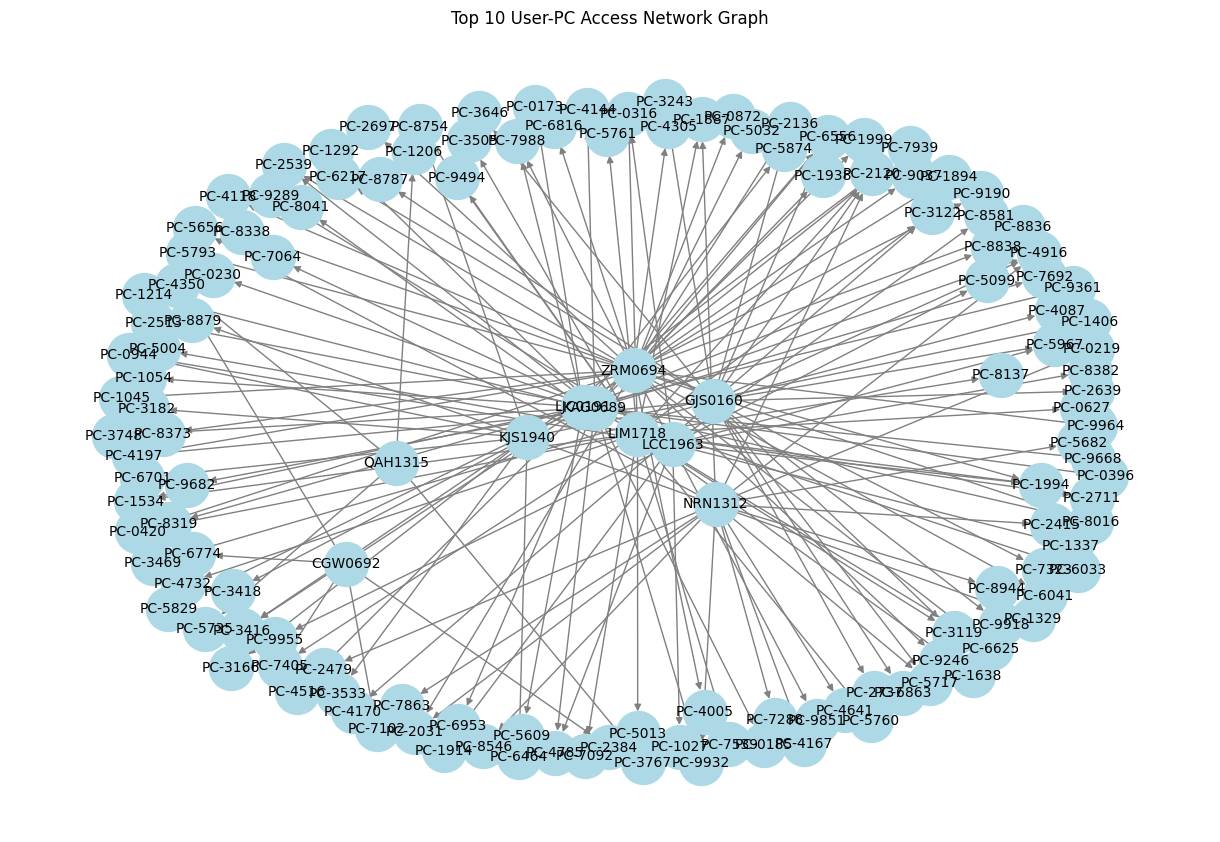

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Get the top 10 users who access the most PCs
top_users = df_user_logon['user'].value_counts().head(10).index

# Get the corresponding rows for the top users
top_user_rows = df_user_logon[df_user_logon['user'].isin(top_users)]

users = top_user_rows['user'].unique()
pcs = top_user_rows['pc'].unique()

G.add_nodes_from(users, node_type='user')
G.add_nodes_from(pcs, node_type='pc')

for _, row in top_user_rows.iterrows():
    G.add_edge(row['user'], row['pc'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=1000, node_color='lightblue', edge_color='gray', font_size=10, font_color='black', with_labels=True)
plt.title("Top 10 User-PC Access Network Graph")
plt.show()


In [ ]:
df_user_logon_copy = df_user_logon.copy()
df_user_logon_copy['activity'] = df_user_logon_copy['activity'].map({'Logon':1,
                                                                     'Logoff':0})
logon = df_user_logon_copy[df_user_logon_copy['activity']==1]
logoff = df_user_logon_copy[df_user_logon_copy['activity']==0]
logon.head()

date     user       pc  activity
0   2010-01-02 06:16:00  ANC1950  PC-4921         1
135 2010-01-02 06:25:00  SAB1954  PC-5091         1
319 2010-01-02 06:28:00  LIM1718  PC-7539         1
521 2010-01-02 07:02:00  CGW0692  PC-6774         1
716 2010-01-02 07:07:00  ZRM0694  PC-6816         1

In [ ]:
time_frequency = 'H'
logon = logon.resample(time_frequency, on='date')['activity'].sum().reset_index().rename({
    'activity':'logon_activity_occurences'
}, axis = 1)
logoff = logoff.resample(time_frequency, on='date')['activity'].sum().reset_index().rename({
    'activity':'logoff_activity_occurences'
}, axis = 1)
logon.head()

date  logon_activity_occurences
0 2010-01-02 06:00:00                          3
1 2010-01-02 07:00:00                         15
2 2010-01-02 08:00:00                          5
3 2010-01-02 09:00:00                          2
4 2010-01-02 10:00:00                          3

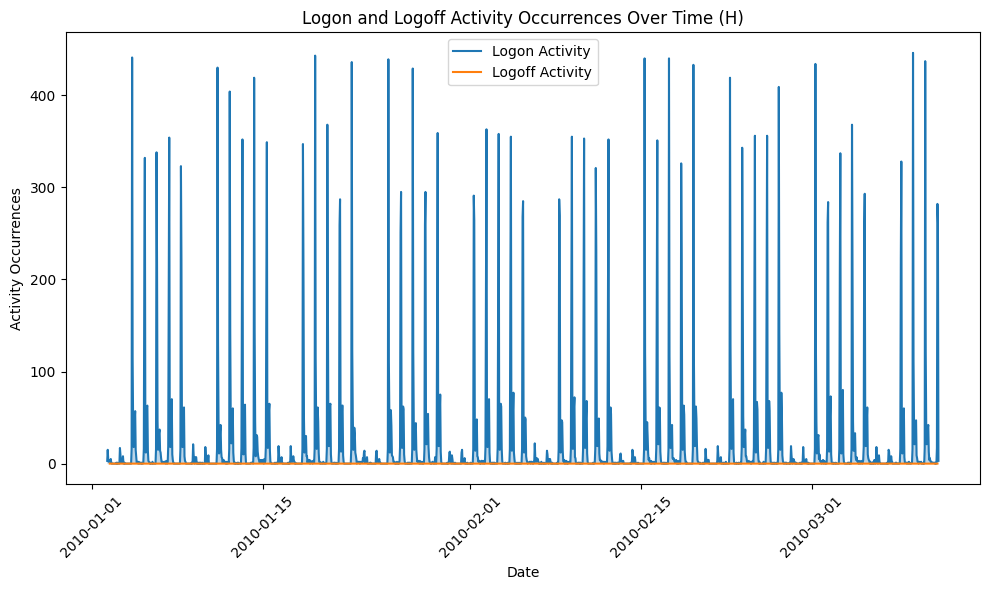

In [ ]:
# Plot both line graphs
plt.figure(figsize=(10, 6))
plt.plot(logon['date'], logon['logon_activity_occurences'], label='Logon Activity')
plt.plot(logoff['date'], logoff['logoff_activity_occurences'], label='Logoff Activity')
plt.fill_between(logon['date'], logon['logon_activity_occurences'], alpha=0.3)
plt.title(f"Logon and Logoff Activity Occurrences Over Time ({time_frequency})")
plt.xlabel("Date")
plt.ylabel("Activity Occurrences")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_user_logon.head()

date     user       pc activity
0   2010-01-02 06:16:00  ANC1950  PC-4921    Logon
135 2010-01-02 06:25:00  SAB1954  PC-5091    Logon
319 2010-01-02 06:28:00  LIM1718  PC-7539    Logon
521 2010-01-02 07:02:00  CGW0692  PC-6774    Logon
716 2010-01-02 07:07:00  ZRM0694  PC-6816    Logon

In [ ]:
# add new column time
df_user_logon['time'] = df_user_logon['date'].dt.time
df_user_logon.head()

date     user       pc activity      time
0   2010-01-02 06:16:00  ANC1950  PC-4921    Logon  06:16:00
135 2010-01-02 06:25:00  SAB1954  PC-5091    Logon  06:25:00
319 2010-01-02 06:28:00  LIM1718  PC-7539    Logon  06:28:00
521 2010-01-02 07:02:00  CGW0692  PC-6774    Logon  07:02:00
716 2010-01-02 07:07:00  ZRM0694  PC-6816    Logon  07:07:00

### **Check Stats on Logon Users**

In [ ]:
# get all logon users
user_logon = df_user_logon.loc[df_user_logon['activity'] == 'Logon']

# add another column hour
user_logon['hour'] = user_logon['date'].dt.hour
user_logon.head()

date     user       pc activity      time  hour
0   2010-01-02 06:16:00  ANC1950  PC-4921    Logon  06:16:00     6
135 2010-01-02 06:25:00  SAB1954  PC-5091    Logon  06:25:00     6
319 2010-01-02 06:28:00  LIM1718  PC-7539    Logon  06:28:00     6
521 2010-01-02 07:02:00  CGW0692  PC-6774    Logon  07:02:00     7
716 2010-01-02 07:07:00  ZRM0694  PC-6816    Logon  07:07:00     7

In [ ]:
login_statitics = user_logon.groupby('user').agg(
   min_time=pd.NamedAgg(column='time', aggfunc='min'),
   max_time=pd.NamedAgg(column='time', aggfunc='max'),
   mode_time=pd.NamedAgg(column='time', aggfunc=lambda x: x.mode().iloc[0]),
   mean_time=pd.NamedAgg(column='hour', aggfunc='mean')
)

# Convert 'hour' column to time format
login_statitics['mean_time'] = pd.to_datetime(login_statitics['mean_time'], format='%H').dt.time

login_statitics

min_time  max_time mode_time mean_time
user                                           
AAB0162  07:30:00  07:50:00  07:50:00  07:00:00
AAC0610  00:29:12  21:11:30  08:03:00  09:00:00
AAC0668  07:45:00  08:13:00  08:01:00  07:00:00
AAP1919  07:30:00  16:33:14  07:45:00  08:00:00
AAP1942  07:30:00  13:40:33  07:45:00  09:00:00
...           ...       ...       ...       ...
ZHM1979  09:17:00  09:32:00  09:30:00  09:00:00
ZJS2648  01:24:10  23:54:00  08:01:00  09:00:00
ZRM0694  00:19:44  23:42:00  07:15:00  09:00:00
ZSL2618  09:15:00  09:43:00  09:24:00  09:00:00
ZVB2656  07:45:00  08:10:00  08:07:00  07:00:00

[600 rows x 4 columns]

**The login_statistics DataFrame provides valuable insights into the logon activity of each user**:

*  **min_time**: Represents the earliest logon time recorded for each user.

*  **max_time:** Indicates the latest logon time observed for each user.

*  **mode_time:** Displays the most frequent logon time among all recorded instances for each user.

*  **mean_time:** Reflects the average logon time across all instances, presented in a time format.


These statistics offer a comprehensive view of user logon behavior, including typical logon times and patterns. By examining these metrics, organizations can gain insights into employee behavior, resource utilization, and operational efficiency.

### **Check Stats on Logoff Users**

In [ ]:
# get all logoff users
user_logoff = df_user_logon.loc[df_user_logon['activity'] == 'Logoff']

# add another column hour
user_logoff['hour'] = user_logoff['date'].dt.hour
user_logoff.head()

date     user       pc activity      time  hour
718  2010-01-02 11:02:44  ZRM0694  PC-2539   Logoff  11:02:44    11
523  2010-01-02 15:22:00  CGW0692  PC-6774   Logoff  15:22:00    15
719  2010-01-02 15:24:00  ZRM0694  PC-6816   Logoff  15:24:00    15
984  2010-01-02 15:39:00  DAR0709  PC-4052   Logoff  15:39:00    15
1344 2010-01-02 16:00:00  KJS1940  PC-3182   Logoff  16:00:00    16

In [ ]:
logoff_statitics = user_logoff.groupby('user').agg(
   min_time=pd.NamedAgg(column='time', aggfunc='min'),
   max_time=pd.NamedAgg(column='time', aggfunc='max'),
   mode_time=pd.NamedAgg(column='time', aggfunc=lambda x: x.mode().iloc[0]),
   mean_time=pd.NamedAgg(column='hour', aggfunc='mean')
)

# Convert 'hour' column to time format
logoff_statitics['mean_time'] = pd.to_datetime(logoff_statitics['mean_time'], format='%H').dt.time

logoff_statitics

min_time  max_time mode_time mean_time
user                                           
AAB0162  18:40:00  19:00:00  18:45:00  18:00:00
AAC0610  04:23:53  17:15:00  16:58:00  15:00:00
AAC0668  16:59:00  17:14:00  17:00:00  16:00:00
AAP1919  08:20:59  16:59:00  16:32:00  14:00:00
AAP1942  15:45:00  16:00:00  15:45:00  15:00:00
...           ...       ...       ...       ...
ZHM1979  17:28:00  17:45:00  17:30:00  17:00:00
ZJS2648  00:36:50  20:53:00  16:55:00  14:00:00
ZRM0694  01:27:55  23:54:47  15:11:00  13:00:00
ZSL2618  18:19:00  18:45:00  18:30:00  18:00:00
ZVB2656  16:50:00  17:12:00  17:00:00  16:00:00

[600 rows x 4 columns]

# **EDA on Device Data**

In [ ]:
# merge the device data with user data
df_user_device = pd.merge(df_device, df_user_, on='user').drop(['id','functional_unit',	'department'], axis = 1)
df_user_device = df_user_device.sort_values(by='date')
# add new column time
df_user_device['time'] = df_user_device['date'].dt.time
df_user_device.head()

date     user       pc  \
0   2010-01-02 07:48:30  ANC1950  PC-4921   
1   2010-01-02 07:55:26  ANC1950  PC-4921   
84  2010-01-02 08:21:16  LAN1329  PC-8190   
85  2010-01-02 08:30:44  LAN1329  PC-8190   
406 2010-01-02 08:32:15  QAH1315  PC-3767   

                                             file_tree    activity      time  
0    R:\;R:\23svS11;R:\26v1D25;R:\314Ym49;R:\53tdGl...     Connect  07:48:30  
1                                                  NaN  Disconnect  07:55:26  
84   R:\;R:\21ZY773;R:\324xR29;R:\37mqq71;R:\54bR5h...     Connect  08:21:16  
85                                                 NaN  Disconnect  08:30:44  
406  R:\;R:\11nH633;R:\31p4g45;R:\74BvN51;R:\77hHs8...     Connect  08:32:15

In [ ]:
df_user_device['activity'].unique()

array(['Connect', 'Disconnect'], dtype=object)

In [ ]:
df_user_device['activity'] = df_user_device['activity'].map({'Connect':1,
                                                                     'Disconnect':0})
connected = df_user_device[df_user_device['activity']==1]
disconnected = df_user_device[df_user_device['activity']==0]
connected.head()

date     user       pc  \
0   2010-01-02 07:48:30  ANC1950  PC-4921   
84  2010-01-02 08:21:16  LAN1329  PC-8190   
406 2010-01-02 08:32:15  QAH1315  PC-3767   
408 2010-01-02 09:02:07  QAH1315  PC-3767   
86  2010-01-02 09:03:14  LAN1329  PC-8190   

                                             file_tree  activity      time  
0    R:\;R:\23svS11;R:\26v1D25;R:\314Ym49;R:\53tdGl...         1  07:48:30  
84   R:\;R:\21ZY773;R:\324xR29;R:\37mqq71;R:\54bR5h...         1  08:21:16  
406  R:\;R:\11nH633;R:\31p4g45;R:\74BvN51;R:\77hHs8...         1  08:32:15  
408  R:\;R:\11nH633;R:\31p4g45;R:\74BvN51;R:\77hHs8...         1  09:02:07  
86   R:\;R:\21ZY773;R:\324xR29;R:\37mqq71;R:\54bR5h...         1  09:03:14

In [ ]:
time_frequency = 'H'
connected = connected.resample(time_frequency, on='date')['activity'].sum().reset_index().rename({
    'activity':'connect_activity_occurences'
}, axis = 1)
disconnected = disconnected.resample(time_frequency, on='date')['activity'].sum().reset_index().rename({
    'activity':'disconnected_activity_occurences'
}, axis = 1)
connected.head()

date  connect_activity_occurences
0 2010-01-02 07:00:00                            1
1 2010-01-02 08:00:00                            2
2 2010-01-02 09:00:00                            3
3 2010-01-02 10:00:00                            3
4 2010-01-02 11:00:00                            5

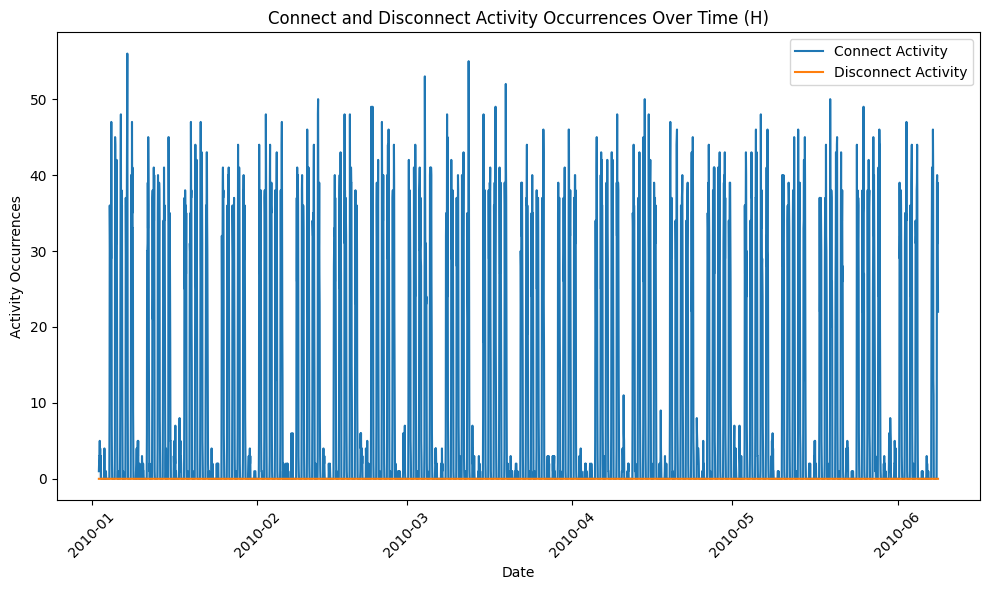

In [ ]:
# Plot both line graphs
plt.figure(figsize=(10, 6))
plt.plot(connected['date'], connected['connect_activity_occurences'], label='Connect Activity')
plt.plot(disconnected['date'], disconnected['disconnected_activity_occurences'], label='Disconnect Activity')
plt.fill_between(connected['date'], connected['connect_activity_occurences'], alpha=0.3)
plt.title(f"Connect and Disconnect Activity Occurrences Over Time ({time_frequency})")
plt.xlabel("Date")
plt.ylabel("Activity Occurrences")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **When Device Connected**

In [ ]:
# get all connected users
user_connect = df_user_device.loc[df_user_device['activity'] == 1]

# add another column hour
user_connect['hour'] = user_connect['date'].dt.hour
user_connect.head()

date     user       pc  \
0   2010-01-02 07:48:30  ANC1950  PC-4921   
84  2010-01-02 08:21:16  LAN1329  PC-8190   
406 2010-01-02 08:32:15  QAH1315  PC-3767   
408 2010-01-02 09:02:07  QAH1315  PC-3767   
86  2010-01-02 09:03:14  LAN1329  PC-8190   

                                             file_tree  activity      time  \
0    R:\;R:\23svS11;R:\26v1D25;R:\314Ym49;R:\53tdGl...         1  07:48:30   
84   R:\;R:\21ZY773;R:\324xR29;R:\37mqq71;R:\54bR5h...         1  08:21:16   
406  R:\;R:\11nH633;R:\31p4g45;R:\74BvN51;R:\77hHs8...         1  08:32:15   
408  R:\;R:\11nH633;R:\31p4g45;R:\74BvN51;R:\77hHs8...         1  09:02:07   
86   R:\;R:\21ZY773;R:\324xR29;R:\37mqq71;R:\54bR5h...         1  09:03:14   

     hour  
0       7  
84      8  
406     8  
408     9  
86      9

In [ ]:
connect_statitics = user_connect.groupby('user').agg(
   min_time=pd.NamedAgg(column='time', aggfunc='min'),
   max_time=pd.NamedAgg(column='time', aggfunc='max'),
   mode_time=pd.NamedAgg(column='time', aggfunc=lambda x: x.mode().iloc[0]),
   mean_time=pd.NamedAgg(column='hour', aggfunc='mean')
)

# Convert 'hour' column to time format
connect_statitics['mean_time'] = pd.to_datetime(connect_statitics['mean_time'], format='%H').dt.time

connect_statitics

min_time  max_time mode_time mean_time
user                                           
AAC0610  07:53:09  16:38:15  07:53:09  12:00:00
AAP1919  07:33:31  16:51:25  07:47:36  11:00:00
ACB0701  07:37:04  15:15:30  07:37:04  10:00:00
ACS1921  07:36:47  16:30:38  15:10:15  11:00:00
ACV1946  07:37:19  19:18:23  13:20:11  10:00:00
...           ...       ...       ...       ...
XAB0627  08:01:16  18:21:24  08:01:16  12:00:00
XIW0171  07:50:18  16:55:03  08:55:51  12:00:00
YDM1720  09:18:09  17:25:39  10:06:09  12:00:00
ZHF1006  07:53:52  17:08:09  08:15:34  11:00:00
ZRM0694  07:10:14  22:32:43  07:10:14  10:00:00

[121 rows x 4 columns]

### **When Device Disconnected**

In [ ]:
# get all connected users
user_disconnect = df_user_device.loc[df_user_device['activity'] == 0]

# add another column hour
user_disconnect['hour'] = user_disconnect['date'].dt.hour
user_disconnect.head()

date     user       pc file_tree  activity      time  hour
1   2010-01-02 07:55:26  ANC1950  PC-4921       NaN         0  07:55:26     7
85  2010-01-02 08:30:44  LAN1329  PC-8190       NaN         0  08:30:44     8
407 2010-01-02 08:48:37  QAH1315  PC-3767       NaN         0  08:48:37     8
409 2010-01-02 09:15:15  QAH1315  PC-3767       NaN         0  09:15:15     9
87  2010-01-02 09:29:39  LAN1329  PC-8190       NaN         0  09:29:39     9

In [ ]:
disconnect_statitics = user_disconnect.groupby('user').agg(
   min_time=pd.NamedAgg(column='time', aggfunc='min'),
   max_time=pd.NamedAgg(column='time', aggfunc='max'),
   mode_time=pd.NamedAgg(column='time', aggfunc=lambda x: x.mode().iloc[0]),
   mean_time=pd.NamedAgg(column='hour', aggfunc='mean')
)

# Convert 'hour' column to time format
disconnect_statitics['mean_time'] = pd.to_datetime(disconnect_statitics['mean_time'], format='%H').dt.time

disconnect_statitics

min_time  max_time mode_time mean_time
user                                           
AAC0610  08:17:14  17:00:31  16:30:01  12:00:00
AAP1919  07:39:19  16:55:43  08:23:12  11:00:00
ACB0701  07:44:32  15:39:29  14:19:52  11:00:00
ACS1921  07:46:31  16:50:32  14:45:12  12:00:00
ACV1946  07:54:08  19:46:54  07:54:08  11:00:00
...           ...       ...       ...       ...
XAB0627  08:11:39  18:47:20  08:11:39  13:00:00
XIW0171  07:56:40  17:02:13  08:30:55  12:00:00
YDM1720  09:30:19  17:38:43  10:02:08  13:00:00
ZHF1006  07:58:47  17:10:27  08:26:43  12:00:00
ZRM0694  07:37:24  23:08:20  07:37:24  10:00:00

[121 rows x 4 columns]

# **EDA on File Data**

In [ ]:
df_file.head(2)

id                date     user       pc  \
0  {F3E2-X3MV05YQ-3516SZDT} 2010-01-02 07:19:41  SDH2394  PC-5849   
1  {I6N1-Z7VL92UY-8715ESKQ} 2010-01-02 07:21:30  SDH2394  PC-5849   

          filename    activity  to_removable_media  from_removable_media  \
0  R:\60WBQE7S.doc   File Open               False                  True   
1  R:\0VGILDW8.pdf  File Write                True                 False   

                                             content  
0  D0-CF-11-E0-A1-B1-1A-E1 Ernesztin's brother, L...  
1  25-50-44-46-2D ---- Bengali As do many other T...

In [ ]:
# merge the device data with user data
df_user_file = pd.merge(df_file, df_user_, on='user').drop(['id','functional_unit',	'department'], axis = 1)
df_user_file = df_user_file.sort_values(by='date')
# add new column time
df_user_file['time'] = df_user_file['date'].dt.time
df_user_file.head()

date     user       pc                 filename    activity  \
0 2010-01-02 07:48:32  ANC1950  PC-4921  R:\26v1D25\DK7Y5BP6.doc   File Open   
1 2010-01-02 07:48:42  ANC1950  PC-4921  C:\ANC1950\AIG3BQT7.pdf   File Open   
2 2010-01-02 07:48:55  ANC1950  PC-4921  R:\53tdGl0\WRB6GQ5E.doc   File Copy   
3 2010-01-02 07:49:21  ANC1950  PC-4921  R:\53tdGl0\T8EHA7HS.doc  File Write   
4 2010-01-02 07:50:14  ANC1950  PC-4921  R:\53tdGl0\KKNYBAXM.pdf   File Copy   

   to_removable_media  from_removable_media  \
0               False                  True   
1               False                 False   
2               False                  True   
3                True                 False   
4                True                 False   

                                             content      time  
0  D0-CF-11-E0-A1-B1-1A-E1 Much as Sir Phillip pa...  07:48:32  
1  25-50-44-46-2D The show retained a similar tim...  07:48:42  
2  D0-CF-11-E0-A1-B1-1A-E1 Krafft-Ebing believed ...  07:48:55  
3  D0-CF-11-E0-A1-B1-1A-E1 Hall uses the mark of ...  07:49:21  
4  25-50-44-46-2D Persuaded that she cannot give ...  07:50:14

In [ ]:
df_user_file['activity'].value_counts()

File Copy      24969
File Open      24237
File Delete    13125
File Write      9187
Name: activity, dtype: int64

In [ ]:
# Extract date from 'date' column
df_user_file['day'] = df_user_file['date'].dt.date

# Filter columns of interest
df_file_ = df_user_file[['user', 'activity', 'day']]

# Group by user and day, then count the file transfers
file_transfer_counts = df_file_.groupby(['user', 'day']).count().reset_index().rename(columns={'activity': 'file_transfer_count'})

file_transfer_counts.head()

user         day  file_transfer_count
0  AAB0162  2010-01-13                    2
1  AAB0162  2010-01-18                    1
2  AAB0162  2010-03-08                    1
3  AAC0610  2010-01-04                    8
4  AAC0610  2010-01-05                    2

In [ ]:
# Max file transfers per day
files_max_per_day = file_transfer_counts.groupby('user')['file_transfer_count'].agg(max).reset_index()
files_max_per_day.rename(columns={'file_transfer_count': "max_transfers_per_user"}, inplace=True)
files_max_per_day.head()

user  max_transfers_per_user
0  AAB0162                       2
1  AAC0610                      18
2  AAC0668                       5
3  AAP1919                      10
4  AAP1942                       2

In [ ]:
files_mode_per_day = file_transfer_counts.groupby('user')['file_transfer_count'].agg(lambda x: x.value_counts().index[0]).reset_index()
files_mode_per_day.rename(columns={'file_transfer_count': "mode_transfers_per_user"}, inplace=True)

files_mode_per_day.head()

user  mode_transfers_per_user
0  AAB0162                        1
1  AAC0610                        7
2  AAC0668                        1
3  AAP1919                        1
4  AAP1942                        1

In [ ]:
file_statistics = pd.merge(files_max_per_day, files_mode_per_day, on='user')
# file_statistics = pd.merge(file_statistics, files_mode_per_day, on='user').drop('day', axis = 1)
file_statistics.head()

user  max_transfers_per_user  mode_transfers_per_user
0  AAB0162                       2                        1
1  AAC0610                      18                        7
2  AAC0668                       5                        1
3  AAP1919                      10                        1
4  AAP1942                       2                        1

In [ ]:
file_statistics.shape

(479, 3)

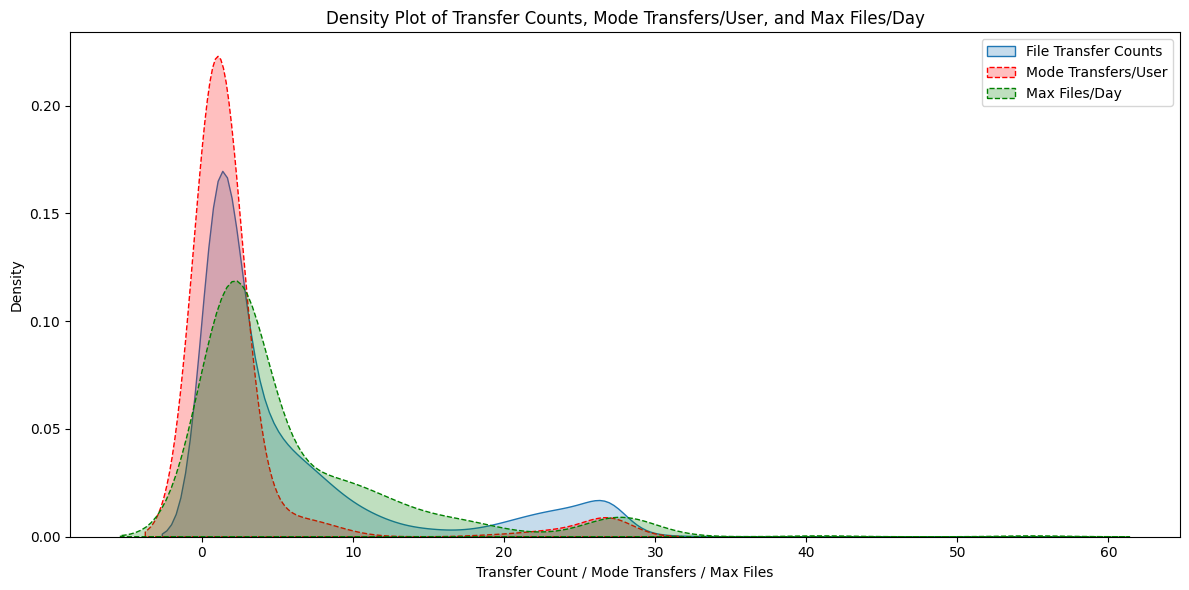

In [ ]:
# Create a density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(file_transfer_counts['file_transfer_count'], shade=True, label='File Transfer Counts')
sns.kdeplot(files_mode_per_day['mode_transfers_per_user'], shade=True, color='r', linestyle='--', label='Mode Transfers/User')
sns.kdeplot(files_max_per_day['max_transfers_per_user'], shade=True, color='g', linestyle='--', label='Max Files/Day')

plt.title("Density Plot of Transfer Counts, Mode Transfers/User, and Max Files/Day")
plt.xlabel("Transfer Count / Mode Transfers / Max Files")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# **Anomaly Detection User Logon/off Data**

In [ ]:
logoff_statitics__ = logoff_statitics.copy()
logoff_statitics__.head()

min_time  max_time mode_time mean_time
user                                           
AAB0162  18:40:00  19:00:00  18:45:00  18:00:00
AAC0610  04:23:53  17:15:00  16:58:00  15:00:00
AAC0668  16:59:00  17:14:00  17:00:00  16:00:00
AAP1919  08:20:59  16:59:00  16:32:00  14:00:00
AAP1942  15:45:00  16:00:00  15:45:00  15:00:00

In [ ]:
# Convert time columns to datetime
for col in logoff_statitics__.columns:
    logoff_statitics__[col] = pd.to_datetime(logoff_statitics__[col], format='%H:%M:%S')

In [ ]:
# Function to convert datetime to time in seconds
def dtt2timestamp(dtt):
    ts = (dtt.hour * 60 + dtt.minute) * 60 + dtt.second
    return ts


# Convert time columns to time in seconds
for col in logoff_statitics__.columns:
    logoff_statitics__["logoff_"+col + '_seconds'] = logoff_statitics__[col].apply(dtt2timestamp)

In [ ]:
logoff_statitics__ = logoff_statitics__[['logoff_min_time_seconds',	'logoff_max_time_seconds',
                                      'logoff_mode_time_seconds',	'logoff_mean_time_seconds']]
logoff_statitics__.head()

logoff_min_time_seconds  logoff_max_time_seconds  \
user                                                        
AAB0162                    67200                    68400   
AAC0610                    15833                    62100   
AAC0668                    61140                    62040   
AAP1919                    30059                    61140   
AAP1942                    56700                    57600   

         logoff_mode_time_seconds  logoff_mean_time_seconds  
user                                                         
AAB0162                     67500                     64800  
AAC0610                     61080                     54000  
AAC0668                     61200                     57600  
AAP1919                     59520                     50400  
AAP1942                     56700                     54000

In [ ]:
(18 * 60 + 40) * 60 + 0

67200

In [ ]:
logon_statitics__ = login_statitics.copy()
logon_statitics__.head()

min_time  max_time mode_time mean_time
user                                           
AAB0162  07:30:00  07:50:00  07:50:00  07:00:00
AAC0610  00:29:12  21:11:30  08:03:00  09:00:00
AAC0668  07:45:00  08:13:00  08:01:00  07:00:00
AAP1919  07:30:00  16:33:14  07:45:00  08:00:00
AAP1942  07:30:00  13:40:33  07:45:00  09:00:00

In [ ]:

# Convert time columns to datetime
for col in logon_statitics__.columns:
    logon_statitics__[col] = pd.to_datetime(logon_statitics__[col], format='%H:%M:%S')

# Convert time columns to time in seconds
for col in logon_statitics__.columns:
    logon_statitics__["logon_"+col + '_seconds'] = logon_statitics__[col].apply(dtt2timestamp)

In [ ]:
logon_statitics__ = logon_statitics__[['logon_min_time_seconds',	'logon_max_time_seconds',
                                      'logon_mode_time_seconds',	'logon_mean_time_seconds']]
logon_statitics__.head()

logon_min_time_seconds  logon_max_time_seconds  \
user                                                      
AAB0162                   27000                   28200   
AAC0610                    1752                   76290   
AAC0668                   27900                   29580   
AAP1919                   27000                   59594   
AAP1942                   27000                   49233   

         logon_mode_time_seconds  logon_mean_time_seconds  
user                                                       
AAB0162                    28200                    25200  
AAC0610                    28980                    32400  
AAC0668                    28860                    25200  
AAP1919                    27900                    28800  
AAP1942                    27900                    32400

In [ ]:
logon_statitics__.shape

(600, 4)

In [ ]:
# Merge the two DataFrames based on the 'user' column
combined_statitics = pd.merge(logon_statitics__.reset_index(), logoff_statitics__.reset_index(), on='user')
combined_statitics.head()

user  logon_min_time_seconds  logon_max_time_seconds  \
0  AAB0162                   27000                   28200   
1  AAC0610                    1752                   76290   
2  AAC0668                   27900                   29580   
3  AAP1919                   27000                   59594   
4  AAP1942                   27000                   49233   

   logon_mode_time_seconds  logon_mean_time_seconds  logoff_min_time_seconds  \
0                    28200                    25200                    67200   
1                    28980                    32400                    15833   
2                    28860                    25200                    61140   
3                    27900                    28800                    30059   
4                    27900                    32400                    56700   

   logoff_max_time_seconds  logoff_mode_time_seconds  logoff_mean_time_seconds  
0                    68400                     67500                     64800  
1                    62100                     61080                     54000  
2                    62040                     61200                     57600  
3                    61140                     59520                     50400  
4                    57600                     56700                     54000

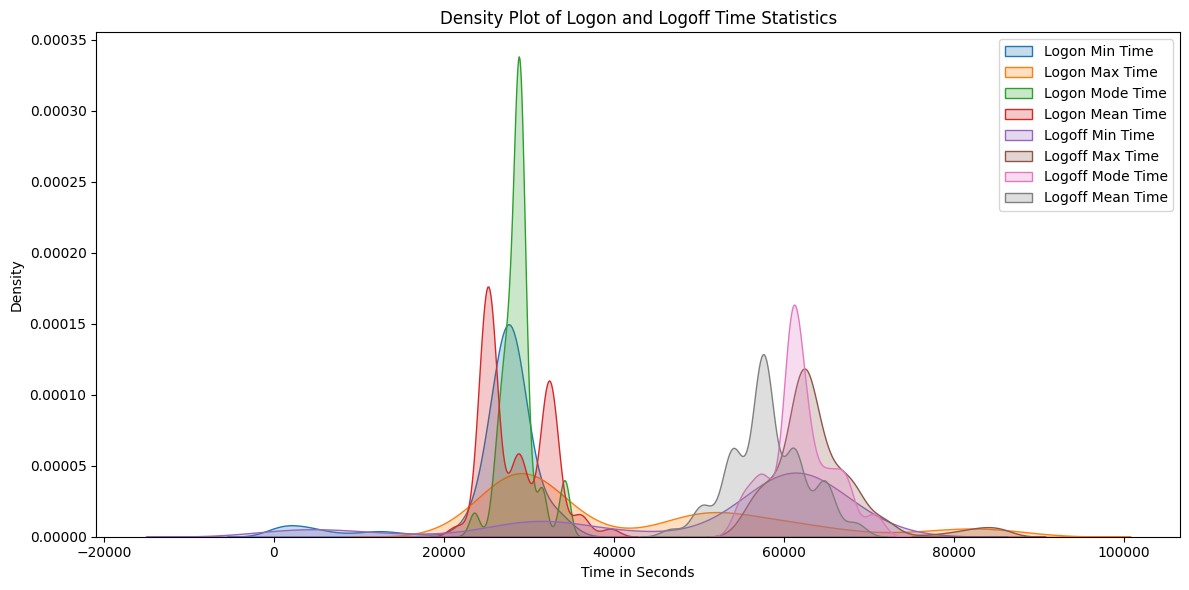

In [ ]:
# Create a density plot for the merged DataFrame columns
plt.figure(figsize=(12, 6))
sns.kdeplot(combined_statitics['logon_min_time_seconds'], shade=True, label='Logon Min Time')
sns.kdeplot(combined_statitics['logon_max_time_seconds'], shade=True, label='Logon Max Time')
sns.kdeplot(combined_statitics['logon_mode_time_seconds'], shade=True, label='Logon Mode Time')
sns.kdeplot(combined_statitics['logon_mean_time_seconds'], shade=True, label='Logon Mean Time')
sns.kdeplot(combined_statitics['logoff_min_time_seconds'], shade=True, label='Logoff Min Time')
sns.kdeplot(combined_statitics['logoff_max_time_seconds'], shade=True, label='Logoff Max Time')
sns.kdeplot(combined_statitics['logoff_mode_time_seconds'], shade=True, label='Logoff Mode Time')
sns.kdeplot(combined_statitics['logoff_mean_time_seconds'], shade=True, label='Logoff Mean Time')

plt.title("Density Plot of Logon and Logoff Time Statistics")
plt.xlabel("Time in Seconds")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
X = combined_statitics.drop('user', axis = 1).values
X

array([[27000, 28200, 28200, ..., 68400, 67500, 64800],
       [ 1752, 76290, 28980, ..., 62100, 61080, 54000],
       [27900, 29580, 28860, ..., 62040, 61200, 57600],
       ...,
       [ 1184, 85320, 26100, ..., 86087, 54660, 46800],
       [33300, 34980, 33840, ..., 67500, 66600, 64800],
       [27900, 29400, 29220, ..., 61920, 61200, 57600]])

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
# Train the Isolation Forest model
model_isf = IsolationForest(bootstrap=False, contamination= 0.05 , max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0).fit(X)

# Train the One-Class SVM model
one_class_svm = OneClassSVM(nu=0.05).fit(X)

# Train the LocalOutlierFactor model
model_lof = LocalOutlierFactor(contamination=0.1,n_neighbors=3, novelty=True).fit(X)
print("Training Done.")

Training Done.


In [ ]:
# Predict anomalies using all models
iso_forest_predictions = model_isf.predict(X)
one_class_svm_predictions = one_class_svm.predict(X)
lof_predictions = model_lof.predict(X)

iso_forest_value_counts = pd.Series(iso_forest_predictions).value_counts()
one_class_svm_value_counts = pd.Series(one_class_svm_predictions).value_counts()
lof_value_counts = pd.Series(lof_predictions).value_counts()

print("Isolation Forest Predictions Value Counts:")
print(iso_forest_value_counts)

print("\nOne-Class SVM Predictions Value Counts:")
print(one_class_svm_value_counts)

print("\nLOF Predictions Value Counts:")
print(lof_value_counts)

Isolation Forest Predictions Value Counts:
 1    570
-1     30
dtype: int64

One-Class SVM Predictions Value Counts:
 1    570
-1     30
dtype: int64

LOF Predictions Value Counts:
 1    574
-1     26
dtype: int64


In [ ]:
def get_decision_score(model, X):
  # Calculate the anomaly scores using the decision function of the Isolation Forest model
  anomaly_scores = model.decision_function(X)

  # Count the number of instances classified as anomalies (anomaly scores < 0)
  num_anomalies = np.sum(anomaly_scores < 0)

  print(f"Number of anomalies detected by {model.__class__.__name__}:", num_anomalies)
  return anomaly_scores

In [ ]:
iso_scores = get_decision_score(model_isf, X)
svm_scores = get_decision_score(one_class_svm, X)
lof_scores = get_decision_score(model_lof, X)

Number of anomalies detected by IsolationForest: 30
Number of anomalies detected by OneClassSVM: 30
Number of anomalies detected by LocalOutlierFactor: 26


In [ ]:
df_user_log = pd.DataFrame()
df_user_log['user'] = combined_statitics['user']
df_user_log['anomaly_score_ios'] = iso_scores
df_user_log['anomaly_score_One_Class_svm'] = svm_scores
df_user_log['anomaly_score_lof'] = lof_scores

df_user_log.head()

user  anomaly_score_ios  anomaly_score_One_Class_svm  anomaly_score_lof
0  AAB0162           0.153110                     0.524843           0.759064
1  AAC0610           0.043733                     0.911839           0.629994
2  AAC0668           0.250033                     0.923476          -0.742634
3  AAP1919           0.114893                     1.565494           0.674511
4  AAP1942           0.143044                     0.890867           0.728010

In [ ]:
def plot_full_graph(df, col, model):
  # Filter users with anomaly scores less than 0
  anomalies = df[df[col] < 0]

  # Create a scatter plot with reduced font size and rotated x-axis labels
  plt.figure(figsize=(15, 8))
  plt.scatter(df['user'], df[col], color='blue', label='Normal')
  plt.scatter(anomalies['user'], anomalies[col], color='red', label='Anomaly', s=100)
  plt.axhline(y=0, color='gray', linestyle='dashed')
  plt.title(f"Anomaly Scores ({model.__class__.__name__}) for Users")
  plt.xlabel("User")
  plt.ylabel("Anomaly Score")
  plt.xticks(rotation=45, fontsize=8)  # Adjust font size and rotation angle
  plt.legend()
  plt.tight_layout()
  plt.show()

def plot_anomaly_graph(df, col, model):
    # Filter users with anomaly scores less than 0
    anomalies = df[df[col] < 0]

    # Create a scatter plot with reduced font size and rotated x-axis labels
    plt.figure(figsize=(15, 8))

    if not anomalies.empty:
        plt.scatter(anomalies['user'], anomalies[col], color='red', label='Anomaly', s=100)
        plt.axhline(y=0, color='gray', linestyle='dashed')
        plt.title(f"Anomaly Scores ({model.__class__.__name__}) for Users")
        plt.xlabel("User")
        plt.ylabel("Anomaly Score")
        plt.xticks(rotation=90, fontsize=8)  # Adjust font size and rotation angle
        plt.legend()
    else:
        plt.text(0.5, 0.5, "No anomalies detected.", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        plt.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

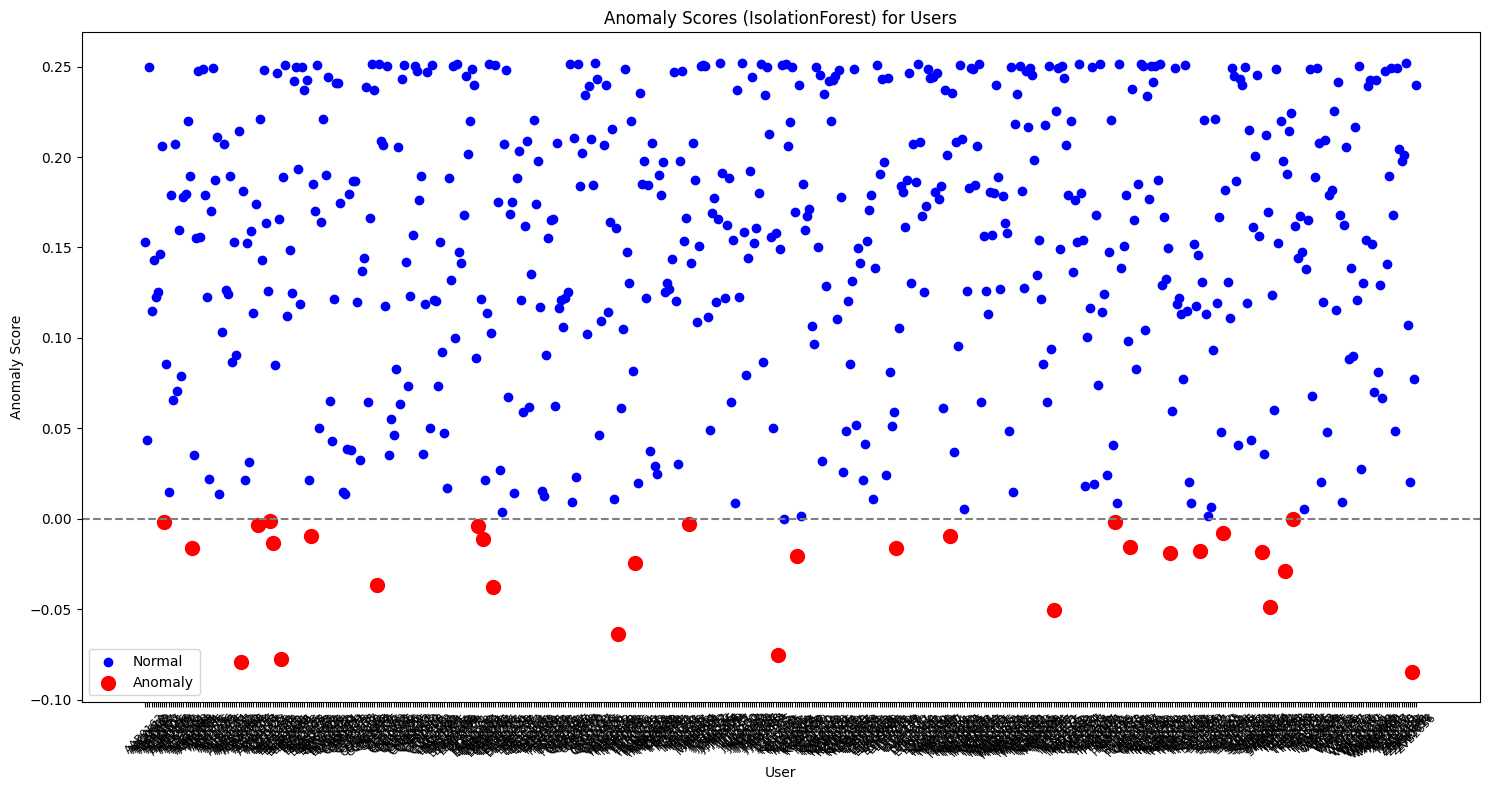

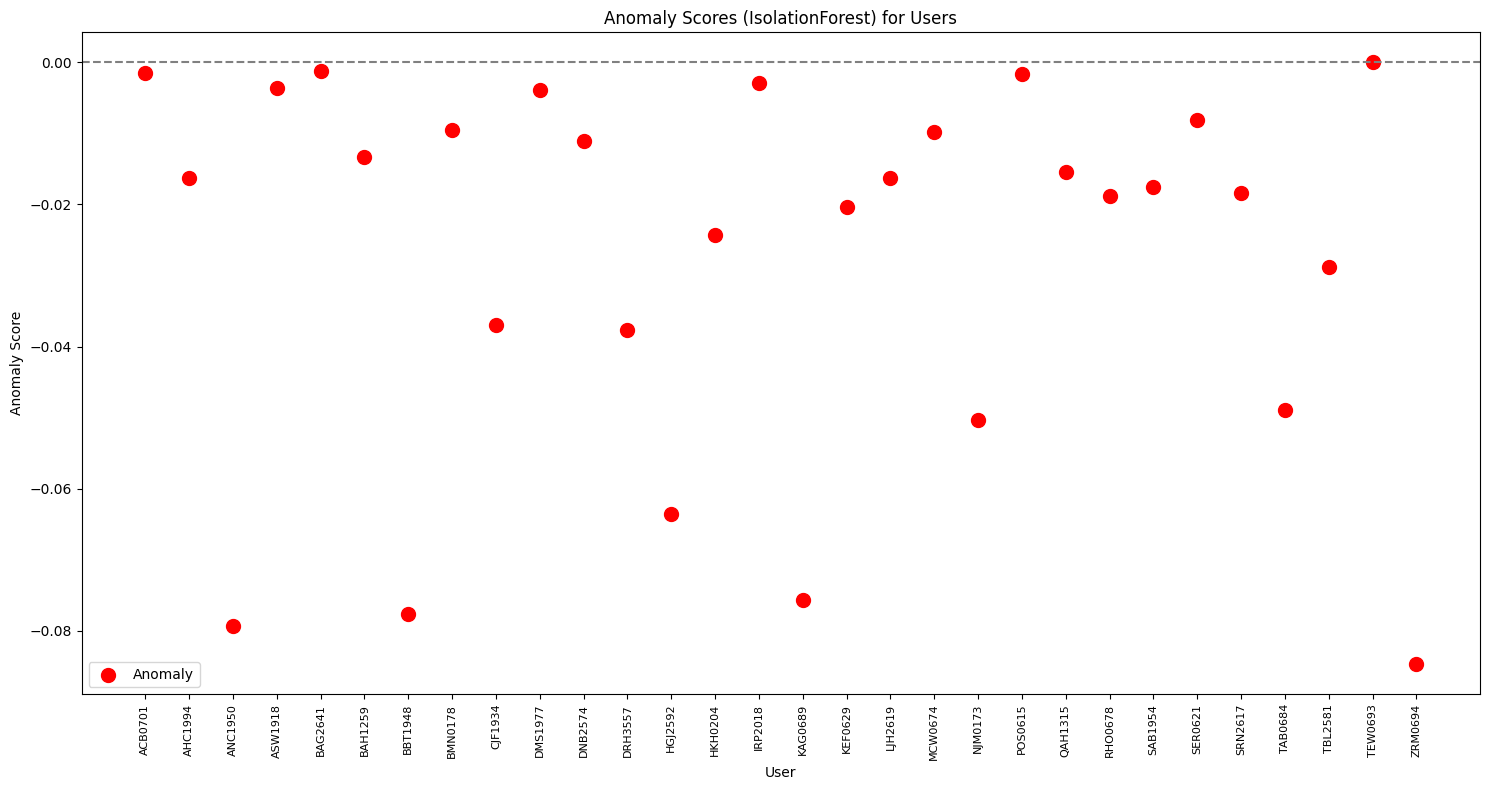

In [ ]:
plot_full_graph(df_user_log, 'anomaly_score_ios', model_isf)
plot_anomaly_graph(df_user_log, 'anomaly_score_ios', model_isf)

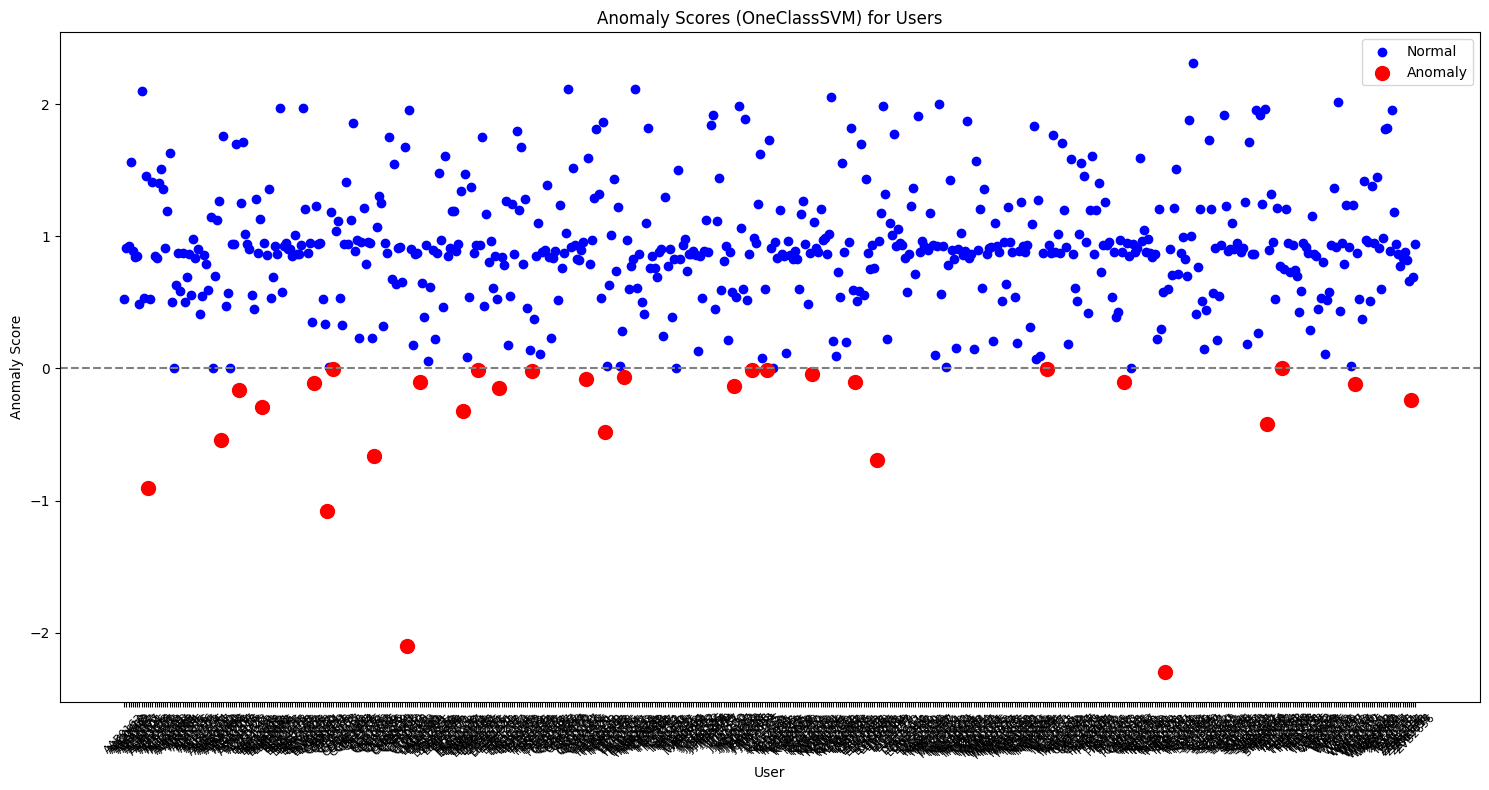

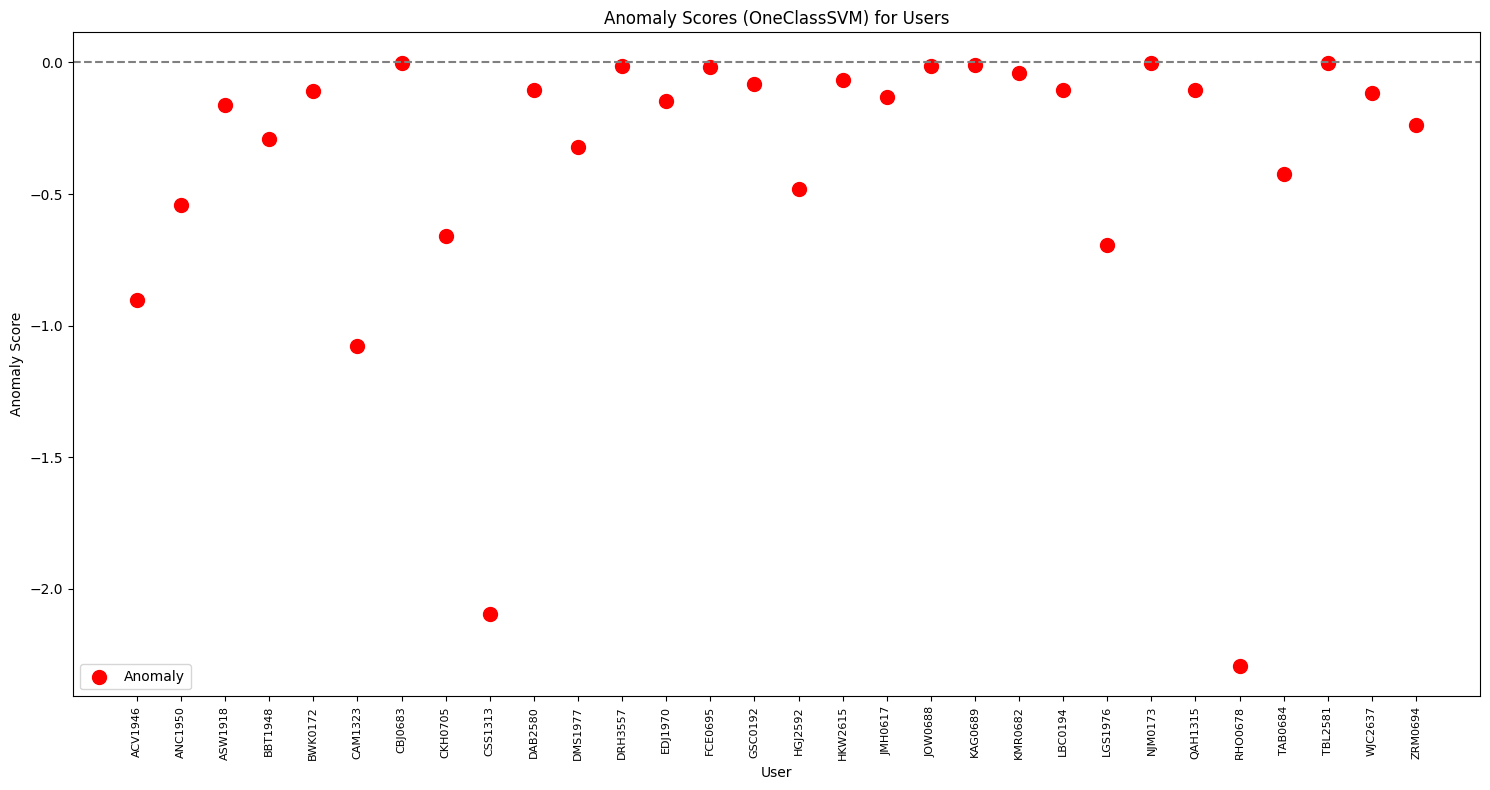

In [ ]:
plot_full_graph(df_user_log, 'anomaly_score_One_Class_svm', one_class_svm)
plot_anomaly_graph(df_user_log, 'anomaly_score_One_Class_svm', one_class_svm)

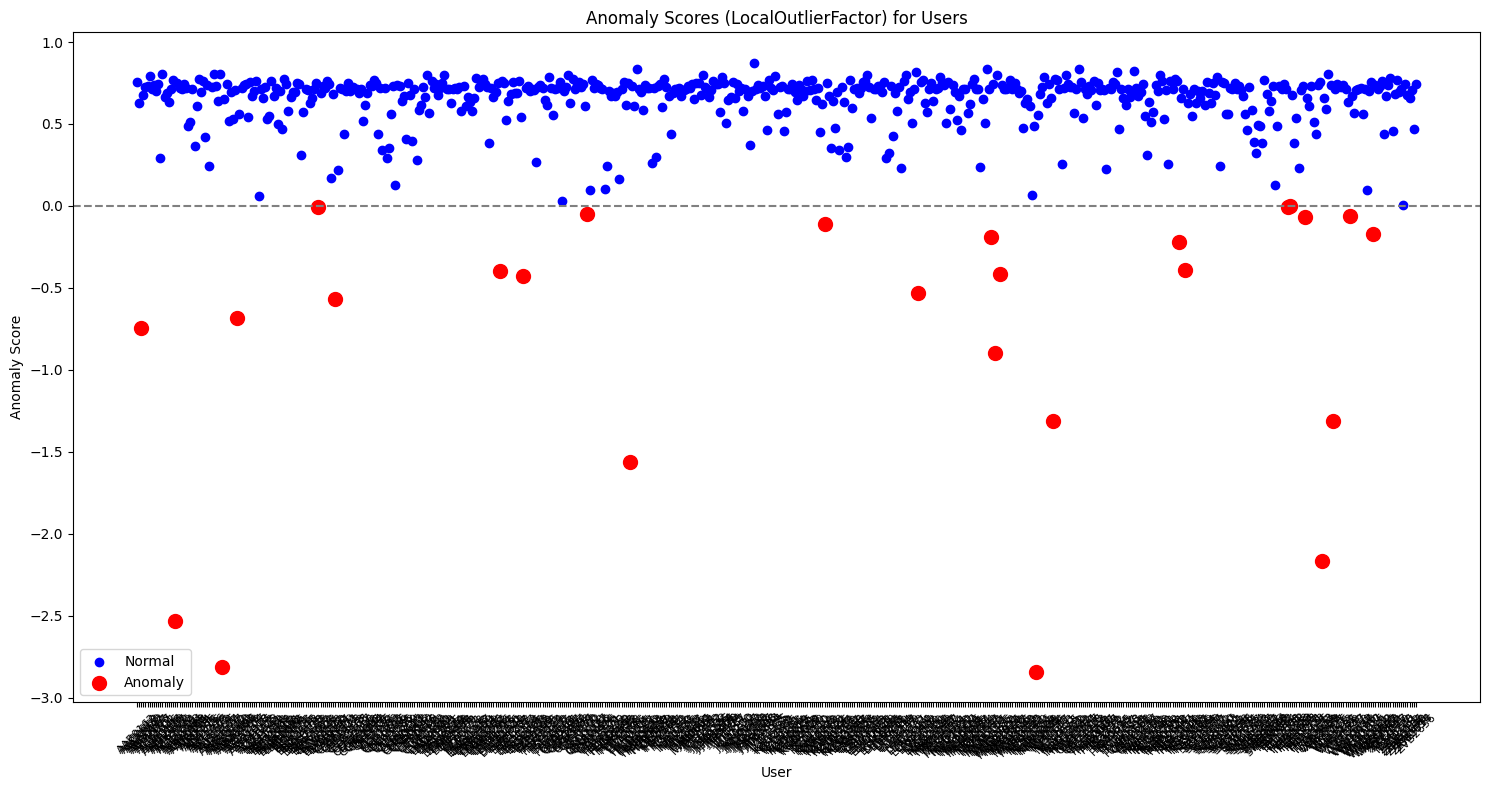

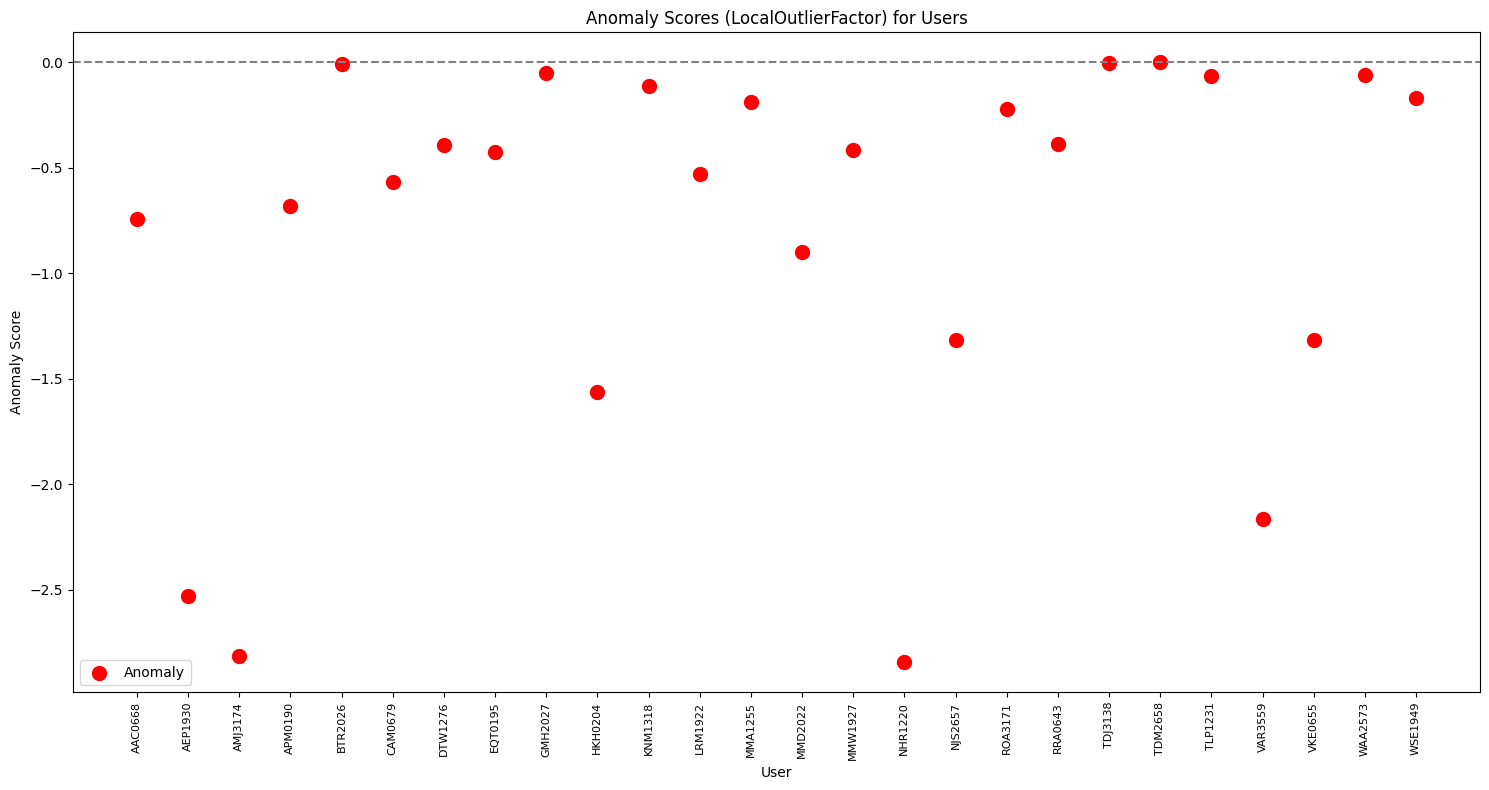

In [ ]:
plot_full_graph(df_user_log, 'anomaly_score_lof', model_lof)
plot_anomaly_graph(df_user_log, 'anomaly_score_lof', model_lof)

# **Anomaly Detection User Logon/off + Device + psychometri + File Data**

In [ ]:
connect_statitics__ = connect_statitics.copy()
connect_statitics__.head()

min_time  max_time mode_time mean_time
user                                           
AAC0610  07:53:09  16:38:15  07:53:09  12:00:00
AAP1919  07:33:31  16:51:25  07:47:36  11:00:00
ACB0701  07:37:04  15:15:30  07:37:04  10:00:00
ACS1921  07:36:47  16:30:38  15:10:15  11:00:00
ACV1946  07:37:19  19:18:23  13:20:11  10:00:00

In [ ]:
# Convert time columns to datetime
for col in connect_statitics__.columns:
    connect_statitics__[col] = pd.to_datetime(connect_statitics__[col], format='%H:%M:%S')

# Convert time columns to time in seconds
for col in connect_statitics__.columns:
    connect_statitics__["connected_"+col + '_seconds'] = connect_statitics__[col].apply(dtt2timestamp)

In [ ]:
connect_statitics__ = connect_statitics__[['connected_min_time_seconds',	'connected_max_time_seconds',
                                      'connected_mode_time_seconds',	'connected_mean_time_seconds']]
connect_statitics__.head()

connected_min_time_seconds  connected_max_time_seconds  \
user                                                              
AAC0610                       28389                       59895   
AAP1919                       27211                       60685   
ACB0701                       27424                       54930   
ACS1921                       27407                       59438   
ACV1946                       27439                       69503   

         connected_mode_time_seconds  connected_mean_time_seconds  
user                                                               
AAC0610                        28389                        43200  
AAP1919                        28056                        39600  
ACB0701                        27424                        36000  
ACS1921                        54615                        39600  
ACV1946                        48011                        36000

In [ ]:
disconnect_statitics__ = disconnect_statitics.copy()
disconnect_statitics__.head()

# Convert time columns to datetime
for col in disconnect_statitics__.columns:
    disconnect_statitics__[col] = pd.to_datetime(disconnect_statitics__[col], format='%H:%M:%S')

# Convert time columns to time in seconds
for col in disconnect_statitics__.columns:
    disconnect_statitics__["disconnected_"+col + '_seconds'] = disconnect_statitics__[col].apply(dtt2timestamp)
disconnect_statitics__ = disconnect_statitics__[['disconnected_min_time_seconds',	'disconnected_max_time_seconds',
                                      'disconnected_mode_time_seconds',	'disconnected_mean_time_seconds']]
disconnect_statitics__.head()

disconnected_min_time_seconds  disconnected_max_time_seconds  \
user                                                                    
AAC0610                          29834                          61231   
AAP1919                          27559                          60943   
ACB0701                          27872                          56369   
ACS1921                          27991                          60632   
ACV1946                          28448                          71214   

         disconnected_mode_time_seconds  disconnected_mean_time_seconds  
user                                                                     
AAC0610                           59401                           43200  
AAP1919                           30192                           39600  
ACB0701                           51592                           39600  
ACS1921                           53112                           43200  
ACV1946                           28448                           39600

In [ ]:
# Merge the two DataFrames based on the 'user' column
combined_statitics_device = pd.merge(connect_statitics__.reset_index(), disconnect_statitics__.reset_index(), on='user')
combined_statitics_device.head()

user  connected_min_time_seconds  connected_max_time_seconds  \
0  AAC0610                       28389                       59895   
1  AAP1919                       27211                       60685   
2  ACB0701                       27424                       54930   
3  ACS1921                       27407                       59438   
4  ACV1946                       27439                       69503   

   connected_mode_time_seconds  connected_mean_time_seconds  \
0                        28389                        43200   
1                        28056                        39600   
2                        27424                        36000   
3                        54615                        39600   
4                        48011                        36000   

   disconnected_min_time_seconds  disconnected_max_time_seconds  \
0                          29834                          61231   
1                          27559                          60943   
2                          27872                          56369   
3                          27991                          60632   
4                          28448                          71214   

   disconnected_mode_time_seconds  disconnected_mean_time_seconds  
0                           59401                           43200  
1                           30192                           39600  
2                           51592                           39600  
3                           53112                           43200  
4                           28448                           39600

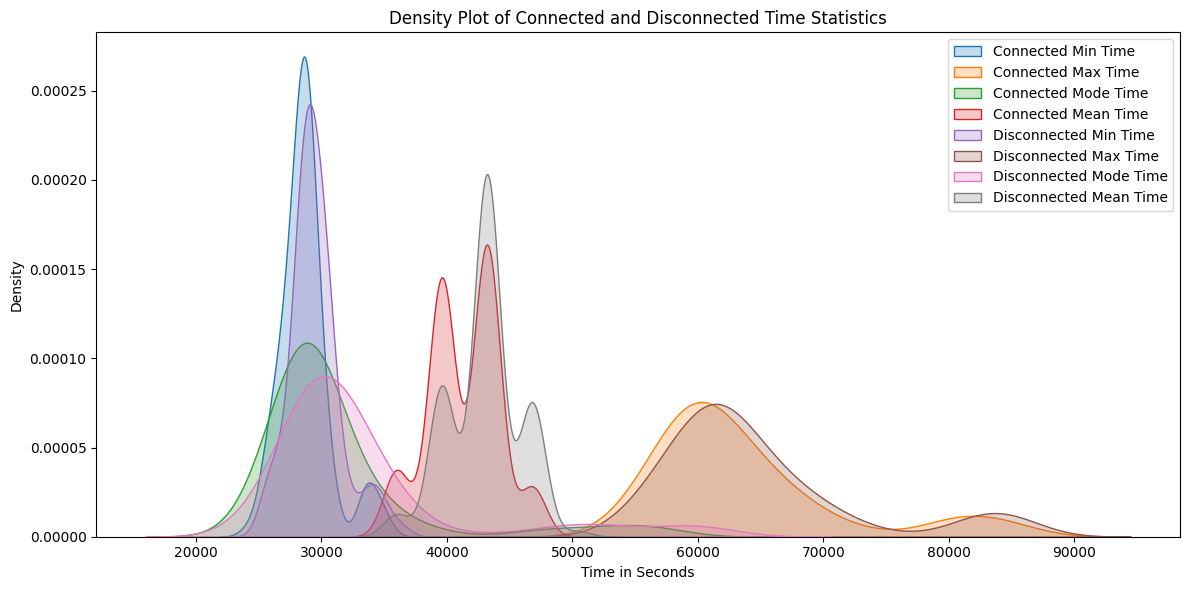

In [ ]:
# Create a density plot for the merged DataFrame columns
plt.figure(figsize=(12, 6))
sns.kdeplot(combined_statitics_device['connected_min_time_seconds'], shade=True, label='Connected Min Time')
sns.kdeplot(combined_statitics_device['connected_max_time_seconds'], shade=True, label='Connected Max Time')
sns.kdeplot(combined_statitics_device['connected_mode_time_seconds'], shade=True, label='Connected Mode Time')
sns.kdeplot(combined_statitics_device['connected_mean_time_seconds'], shade=True, label='Connected Mean Time')
sns.kdeplot(combined_statitics_device['disconnected_min_time_seconds'], shade=True, label='Disconnected Min Time')
sns.kdeplot(combined_statitics_device['disconnected_max_time_seconds'], shade=True, label='Disconnected Max Time')
sns.kdeplot(combined_statitics_device['disconnected_mode_time_seconds'], shade=True, label='Disconnected Mode Time')
sns.kdeplot(combined_statitics_device['disconnected_mean_time_seconds'], shade=True, label='Disconnected Mean Time')

plt.title("Density Plot of Connected and Disconnected Time Statistics")
plt.xlabel("Time in Seconds")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_psychometric = df_psychometric.rename(columns={'user_id':'user'})
df_psychometric.head()

employee_name     user   O   C   E   A   N
0  Nicholas Fletcher Pruitt  NFP2441  34  39  38  36  21
1     Abraham Dante Rodgers  ADR1517  36  39  13  19  27
2     Medge Wilma Blackburn  MWB4000  27  14  44  22  34
3     Meghan Laurel Salazar  MLS2856  35  49  22  45  28
4          Beau Todd Romero  BTR2026  15  15  41  39  27

In [ ]:
# merge the device data with user data
df_psychometric_user = pd.merge(df_psychometric, df_user_, on='user').drop(['functional_unit',	'department'], axis = 1)
df_psychometric_user.head()

employee_name     user   O   C   E   A   N
0      Beau Todd Romero  BTR2026  15  15  41  39  27
1   Sierra Emily Mendez  SEM1983  42  19  23  31  22
2       Carl Louis Rice  CLR1239  46  44  38  44  23
3  Kai Melissa Bradford  KMB3003  39  43  14  38  32
4     Hedy Darryl Noble  HDN2609  37  30  19  43  31

In [ ]:
df_psychometric_ = df_psychometric_user.drop('employee_name', axis = 1)
df_psychometric_.head()

user   O   C   E   A   N
0  BTR2026  15  15  41  39  27
1  SEM1983  42  19  23  31  22
2  CLR1239  46  44  38  44  23
3  KMB3003  39  43  14  38  32
4  HDN2609  37  30  19  43  31

In [ ]:
# Merge the two DataFrames based on the 'user' column
combined_statitics_device_psychometric = pd.merge(combined_statitics_device, df_psychometric_, on='user')
combined_statitics_device_psychometric.head()

user  connected_min_time_seconds  connected_max_time_seconds  \
0  AAC0610                       28389                       59895   
1  AAP1919                       27211                       60685   
2  ACB0701                       27424                       54930   
3  ACS1921                       27407                       59438   
4  ACV1946                       27439                       69503   

   connected_mode_time_seconds  connected_mean_time_seconds  \
0                        28389                        43200   
1                        28056                        39600   
2                        27424                        36000   
3                        54615                        39600   
4                        48011                        36000   

   disconnected_min_time_seconds  disconnected_max_time_seconds  \
0                          29834                          61231   
1                          27559                          60943   
2                          27872                          56369   
3                          27991                          60632   
4                          28448                          71214   

   disconnected_mode_time_seconds  disconnected_mean_time_seconds   O   C   E  \
0                           59401                           43200  46  35  50   
1                           30192                           39600  45  15  14   
2                           51592                           39600  44  37  38   
3                           53112                           43200  37  18  41   
4                           28448                           39600  49  45  18   

    A   N  
0  42  31  
1  41  28  
2  37  38  
3  25  26  
4  39  38

In [ ]:
# Merge the two DataFrames based on the 'user' column
combined_statitics_logon_device_psychometric = pd.merge(combined_statitics, combined_statitics_device_psychometric, on='user')
combined_statitics_logon_device_psychometric.head()

user  logon_min_time_seconds  logon_max_time_seconds  \
0  AAC0610                    1752                   76290   
1  AAP1919                   27000                   59594   
2  ACB0701                    8519                   77773   
3  ACS1921                   27060                   59769   
4  ACV1946                   27000                   85609   

   logon_mode_time_seconds  logon_mean_time_seconds  logoff_min_time_seconds  \
0                    28980                    32400                    15833   
1                    27900                    28800                    30059   
2                    27000                    28800                    10398   
3                    27240                    25200                    28482   
4                    27900                    32400                    12016   

   logoff_max_time_seconds  logoff_mode_time_seconds  \
0                    62100                     61080   
1                    61140                     59520   
2                    56700                     55800   
3                    61200                     59640   
4                    57540                     56640   

   logoff_mean_time_seconds  connected_min_time_seconds  \
0                     54000                       28389   
1                     50400                       27211   
2                     50400                       27424   
3                     50400                       27407   
4                     50400                       27439   

   connected_max_time_seconds  connected_mode_time_seconds  \
0                       59895                        28389   
1                       60685                        28056   
2                       54930                        27424   
3                       59438                        54615   
4                       69503                        48011   

   connected_mean_time_seconds  disconnected_min_time_seconds  \
0                        43200                          29834   
1                        39600                          27559   
2                        36000                          27872   
3                        39600                          27991   
4                        36000                          28448   

   disconnected_max_time_seconds  disconnected_mode_time_seconds  \
0                          61231                           59401   
1                          60943                           30192   
2                          56369                           51592   
3                          60632                           53112   
4                          71214                           28448   

   disconnected_mean_time_seconds   O   C   E   A   N  
0                           43200  46  35  50  42  31  
1                           39600  45  15  14  41  28  
2                           39600  44  37  38  37  38  
3                           43200  37  18  41  25  26  
4                           39600  49  45  18  39  38

In [ ]:
combined_statitics_logon_device_psychometric.shape

(121, 22)

In [ ]:
# Merge the two DataFrames based on the 'user' column
combined_statitics_logon_device_psychometric_file = combined_statitics_logon_device_psychometric.merge(file_statistics, on='user')
combined_statitics_logon_device_psychometric_file.head()

user  logon_min_time_seconds  logon_max_time_seconds  \
0  AAC0610                    1752                   76290   
1  AAP1919                   27000                   59594   
2  ACB0701                    8519                   77773   
3  ACS1921                   27060                   59769   
4  ACV1946                   27000                   85609   

   logon_mode_time_seconds  logon_mean_time_seconds  logoff_min_time_seconds  \
0                    28980                    32400                    15833   
1                    27900                    28800                    30059   
2                    27000                    28800                    10398   
3                    27240                    25200                    28482   
4                    27900                    32400                    12016   

   logoff_max_time_seconds  logoff_mode_time_seconds  \
0                    62100                     61080   
1                    61140                     59520   
2                    56700                     55800   
3                    61200                     59640   
4                    57540                     56640   

   logoff_mean_time_seconds  connected_min_time_seconds  \
0                     54000                       28389   
1                     50400                       27211   
2                     50400                       27424   
3                     50400                       27407   
4                     50400                       27439   

   connected_max_time_seconds  connected_mode_time_seconds  \
0                       59895                        28389   
1                       60685                        28056   
2                       54930                        27424   
3                       59438                        54615   
4                       69503                        48011   

   connected_mean_time_seconds  disconnected_min_time_seconds  \
0                        43200                          29834   
1                        39600                          27559   
2                        36000                          27872   
3                        39600                          27991   
4                        36000                          28448   

   disconnected_max_time_seconds  disconnected_mode_time_seconds  \
0                          61231                           59401   
1                          60943                           30192   
2                          56369                           51592   
3                          60632                           53112   
4                          71214                           28448   

   disconnected_mean_time_seconds   O   C   E   A   N  max_transfers_per_user  \
0                           43200  46  35  50  42  31                      18   
1                           39600  45  15  14  41  28                      10   
2                           39600  44  37  38  37  38                      16   
3                           43200  37  18  41  25  26                      18   
4                           39600  49  45  18  39  38                      16   

   mode_transfers_per_user  
0                        7  
1                        1  
2                        1  
3                        7  
4                        5

In [ ]:
combined_statitics_logon_device_psychometric_file.shape

(121, 24)

In [ ]:
X1 = combined_statitics_logon_device_psychometric_file.drop('user', axis = 1).values
X1[:5]

array([[ 1752, 76290, 28980, 32400, 15833, 62100, 61080, 54000, 28389,
        59895, 28389, 43200, 29834, 61231, 59401, 43200,    46,    35,
           50,    42,    31,    18,     7],
       [27000, 59594, 27900, 28800, 30059, 61140, 59520, 50400, 27211,
        60685, 28056, 39600, 27559, 60943, 30192, 39600,    45,    15,
           14,    41,    28,    10,     1],
       [ 8519, 77773, 27000, 28800, 10398, 56700, 55800, 50400, 27424,
        54930, 27424, 36000, 27872, 56369, 51592, 39600,    44,    37,
           38,    37,    38,    16,     1],
       [27060, 59769, 27240, 25200, 28482, 61200, 59640, 50400, 27407,
        59438, 54615, 39600, 27991, 60632, 53112, 43200,    37,    18,
           41,    25,    26,    18,     7],
       [27000, 85609, 27900, 32400, 12016, 57540, 56640, 50400, 27439,
        69503, 48011, 36000, 28448, 71214, 28448, 39600,    49,    45,
           18,    39,    38,    16,     5]])

In [ ]:
# Train the Isolation Forest model
model_isf = IsolationForest(bootstrap=False, contamination= 0.05 , max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0).fit(X1)

# Train the One-Class SVM model
one_class_svm = OneClassSVM(nu=0.05).fit(X1)

# Train the LocalOutlierFactor model
model_lof = LocalOutlierFactor(contamination=0.1,n_neighbors=3, novelty=True).fit(X1)
print("Training Done.")

Training Done.


In [ ]:
# Predict anomalies using all models
iso_forest_predictions = model_isf.predict(X1)
one_class_svm_predictions = one_class_svm.predict(X1)
lof_predictions = model_lof.predict(X1)

iso_forest_value_counts = pd.Series(iso_forest_predictions).value_counts()
one_class_svm_value_counts = pd.Series(one_class_svm_predictions).value_counts()
lof_value_counts = pd.Series(lof_predictions).value_counts()

print("Isolation Forest Predictions Value Counts:")
print(iso_forest_value_counts)

print("\nOne-Class SVM Predictions Value Counts:")
print(one_class_svm_value_counts)

print("\nLOF Predictions Value Counts:")
print(lof_value_counts)

Isolation Forest Predictions Value Counts:
 1    115
-1      6
dtype: int64

One-Class SVM Predictions Value Counts:
 1    115
-1      6
dtype: int64

LOF Predictions Value Counts:
 1    114
-1      7
dtype: int64


In [ ]:
iso_scores = get_decision_score(model_isf, X1)
svm_scores = get_decision_score(one_class_svm, X1)
lof_scores = get_decision_score(model_lof, X1)

df_user_all = pd.DataFrame()
df_user_all['user'] = combined_statitics_logon_device_psychometric_file['user']
df_user_all['anomaly_score_ios'] = iso_scores
df_user_all['anomaly_score_One_Class_svm'] = svm_scores
df_user_all['anomaly_score_lof'] = lof_scores

df_user_all.head()

Number of anomalies detected by IsolationForest: 6
Number of anomalies detected by OneClassSVM: 6
Number of anomalies detected by LocalOutlierFactor: 7


user  anomaly_score_ios  anomaly_score_One_Class_svm  anomaly_score_lof
0  AAC0610           0.073420                     0.086705           0.226797
1  AAP1919           0.122147                     0.407630           0.514656
2  ACB0701           0.052633                    -0.000168           0.316753
3  ACS1921           0.063100                     0.143780           0.187055
4  ACV1946           0.004167                     0.066876           0.157891

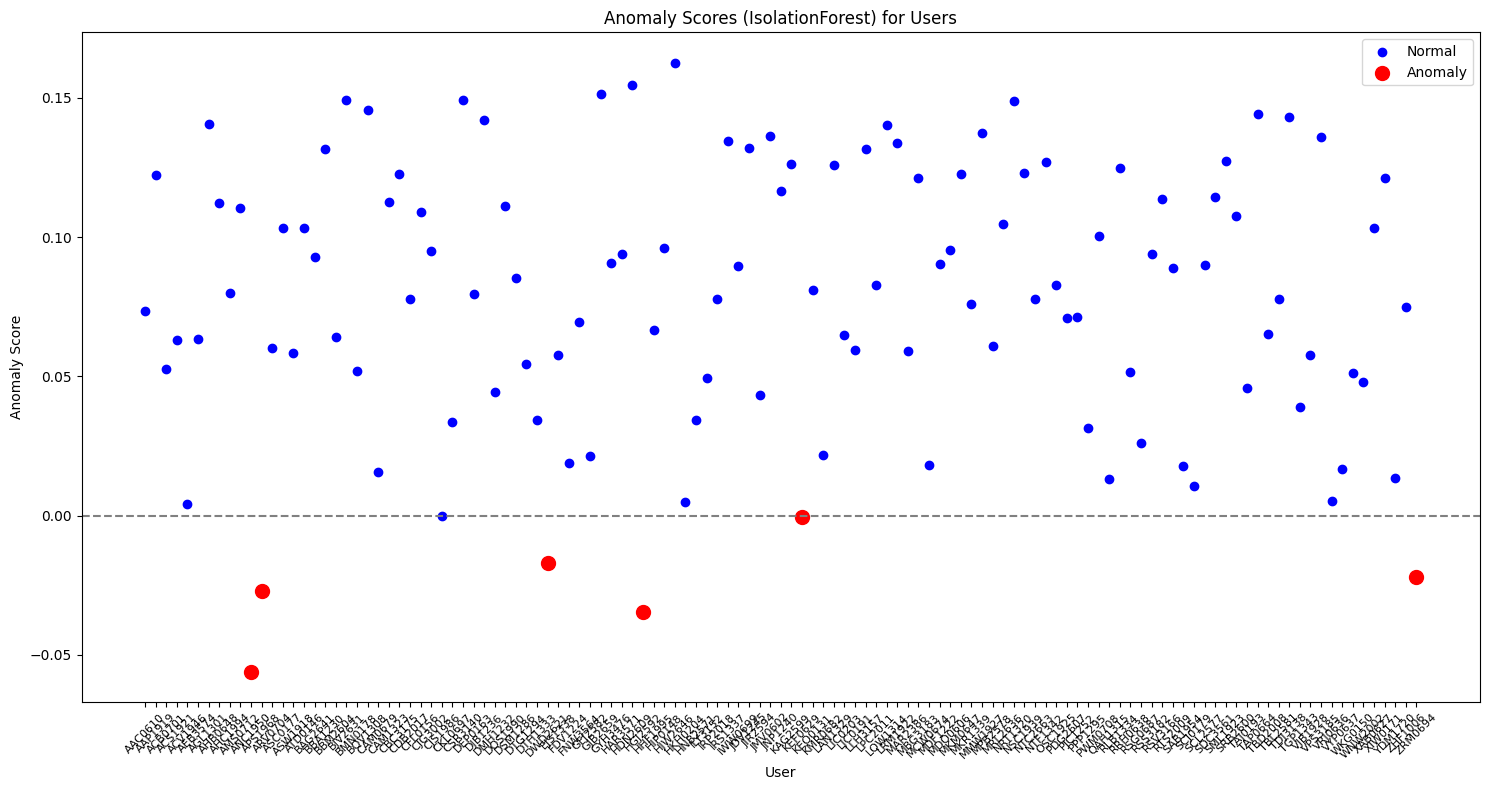

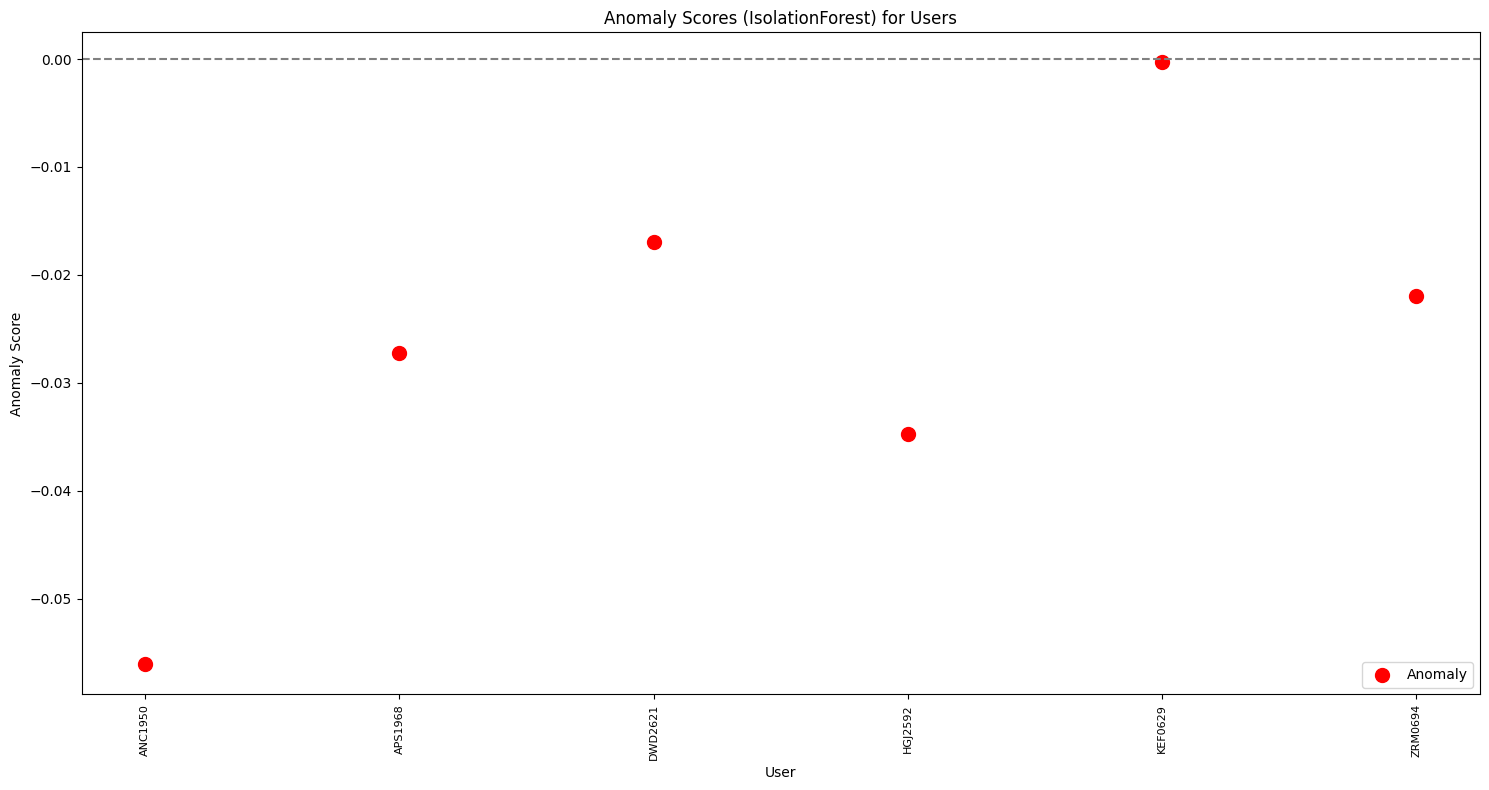

In [ ]:
plot_full_graph(df_user_all, 'anomaly_score_ios', model_isf)
plot_anomaly_graph(df_user_all, 'anomaly_score_ios', model_isf)

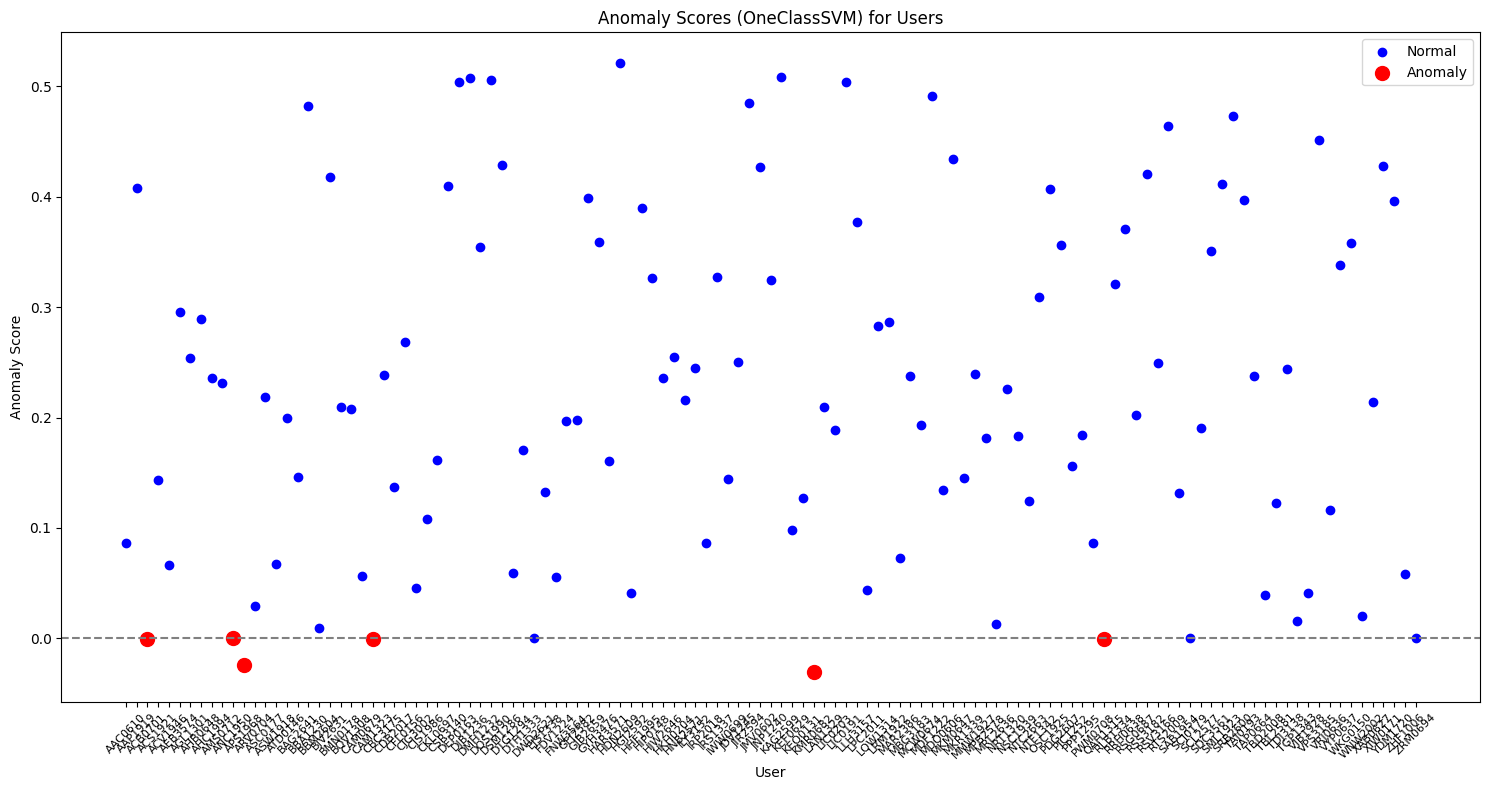

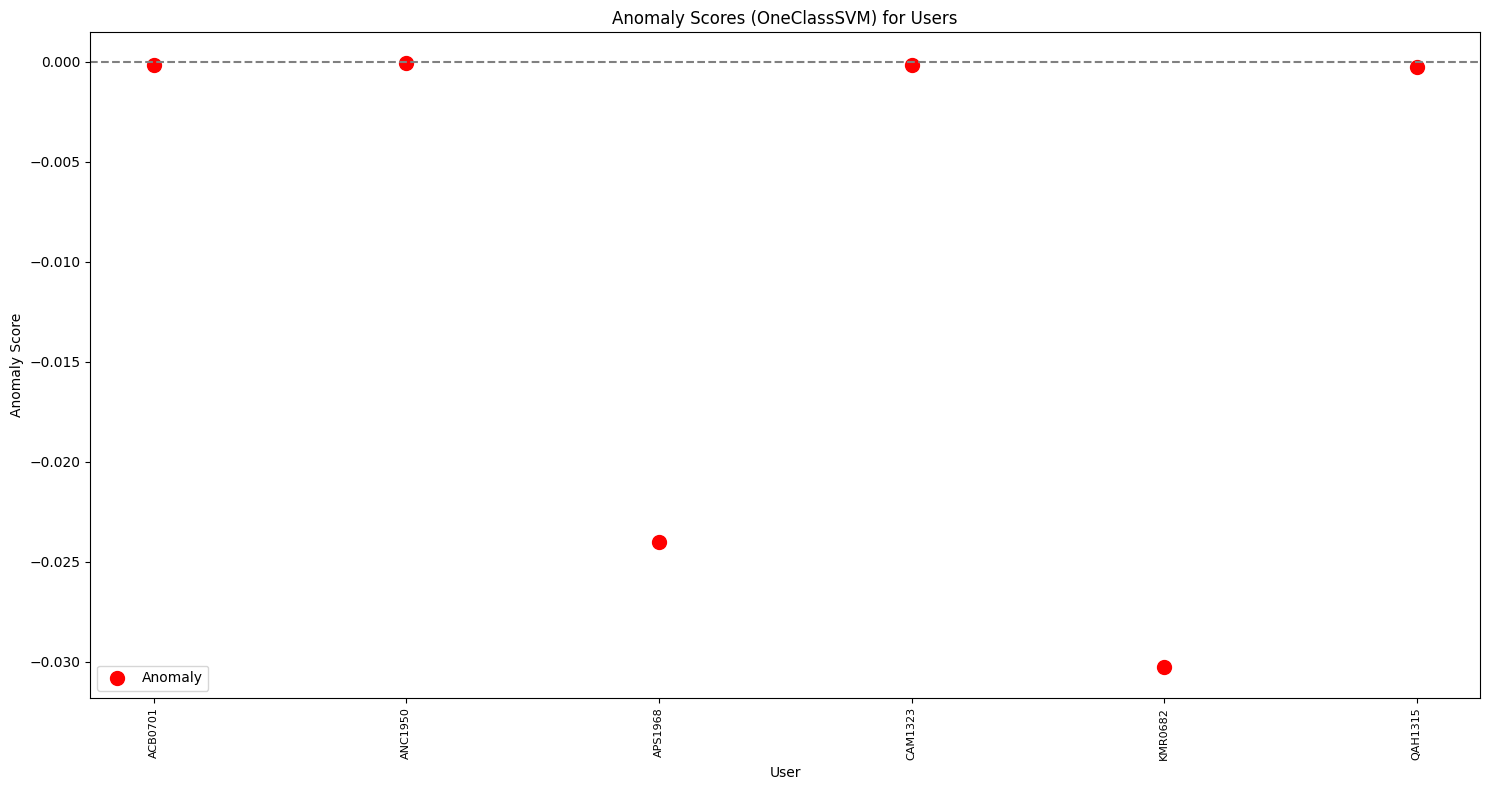

In [ ]:

plot_full_graph(df_user_all, 'anomaly_score_One_Class_svm', one_class_svm)
plot_anomaly_graph(df_user_all, 'anomaly_score_One_Class_svm', one_class_svm)

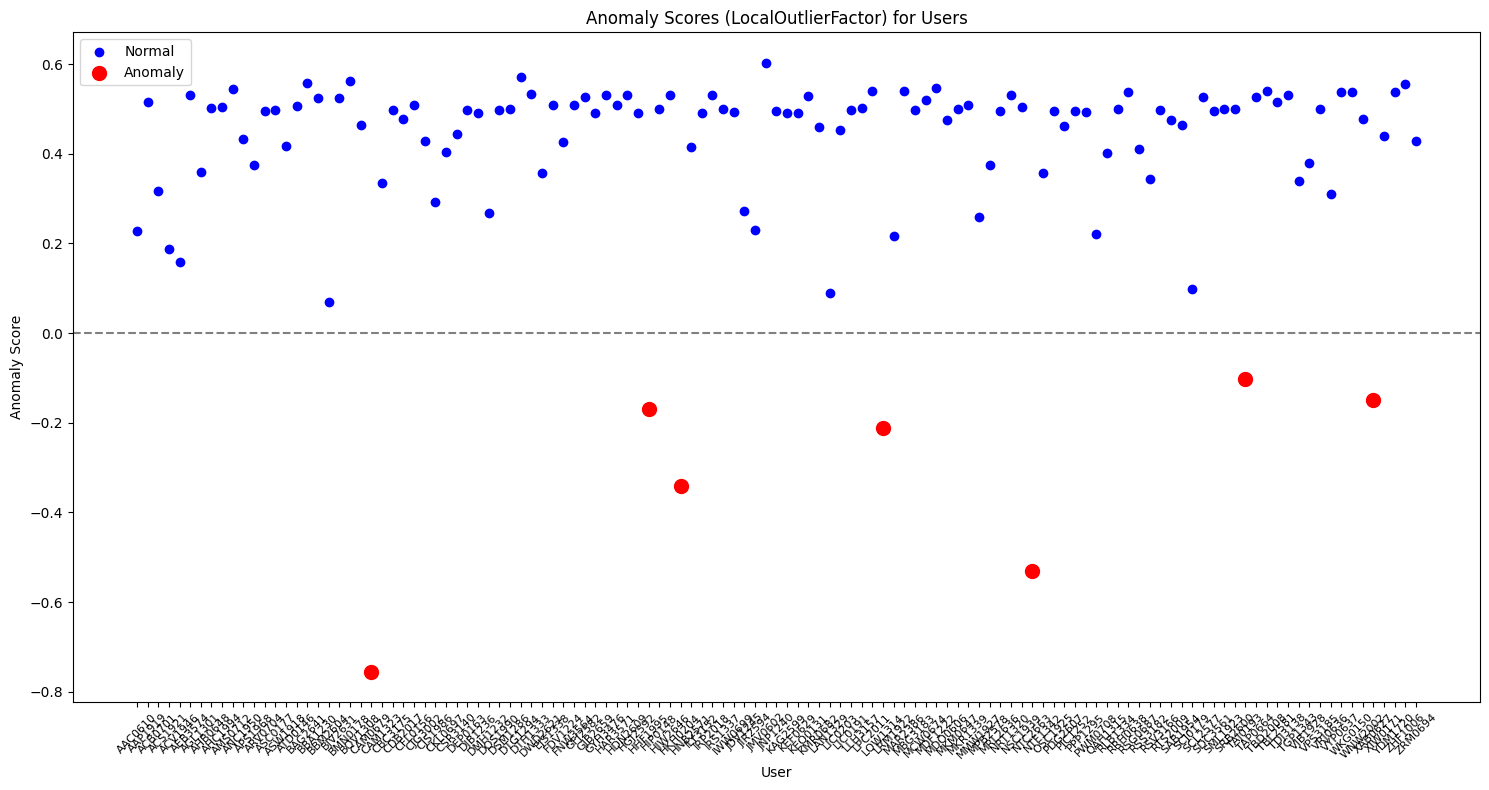

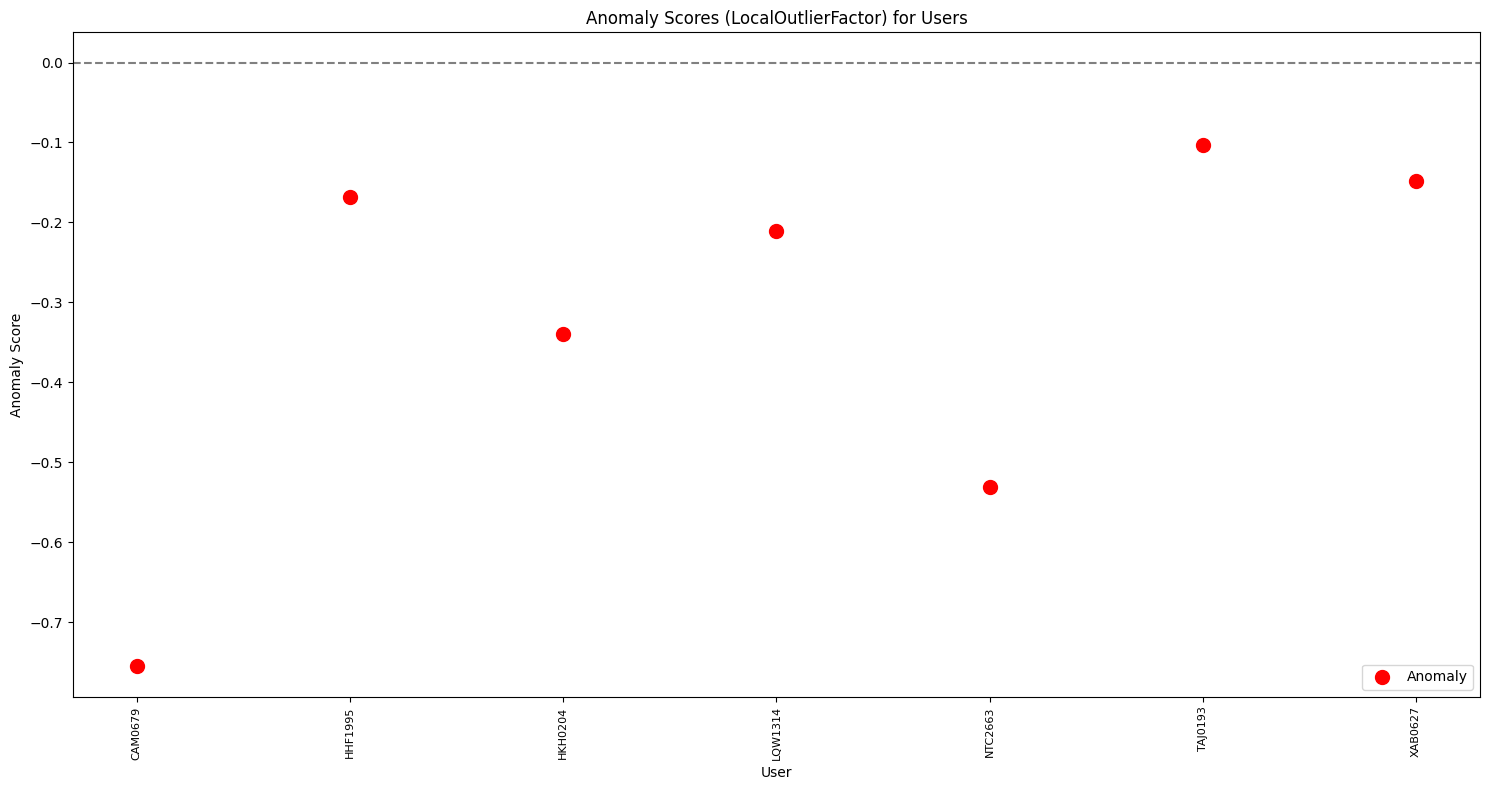

In [ ]:
plot_full_graph(df_user_all, 'anomaly_score_lof', model_lof)
plot_anomaly_graph(df_user_all, 'anomaly_score_lof', model_lof)

# **Anomaly Detection User Http + Mail Data**

In [ ]:
df_http.head()

id                date     user       pc  \
0  {V1D3-W8BL16YA-2594OWGB} 2010-01-02 06:21:31  ANC1950  PC-4921   
1  {C7A0-F6CK17IX-5508HGRY} 2010-01-02 06:21:42  ANC1950  PC-4921   
2  {C0X3-I5RZ16GM-1535IAMY} 2010-01-02 06:21:58  ANC1950  PC-4921   
3  {G8V6-M0CF17SO-9968THHW} 2010-01-02 06:28:04  ANC1950  PC-4921   
4  {I9A3-Z4JU92SK-7362XXPN} 2010-01-02 06:29:26  SAB1954  PC-5091   

                                                 url   activity  \
0  http://icio.us/John_Edward_Brownlee_as_Attorne...  WWW Visit   
1  http://babycenter.com/Manchester_SmallScale_Ex...  WWW Visit   
2  http://babycenter.com/Manchester_SmallScale_Ex...  WWW Visit   
3  http://timeanddate.com/Accurate_News_and_Infor...  WWW Visit   
4  http://timeanddate.com/Accurate_News_and_Infor...  WWW Visit   

                                             content  
0  Further consultation with post-production team...  
1  These two populations have been observed in ma...  
2  These two populations have been observed in ma...  
3  Cape sold the US rights to the recently formed...  
4  Cape sold the US rights to the recently formed...

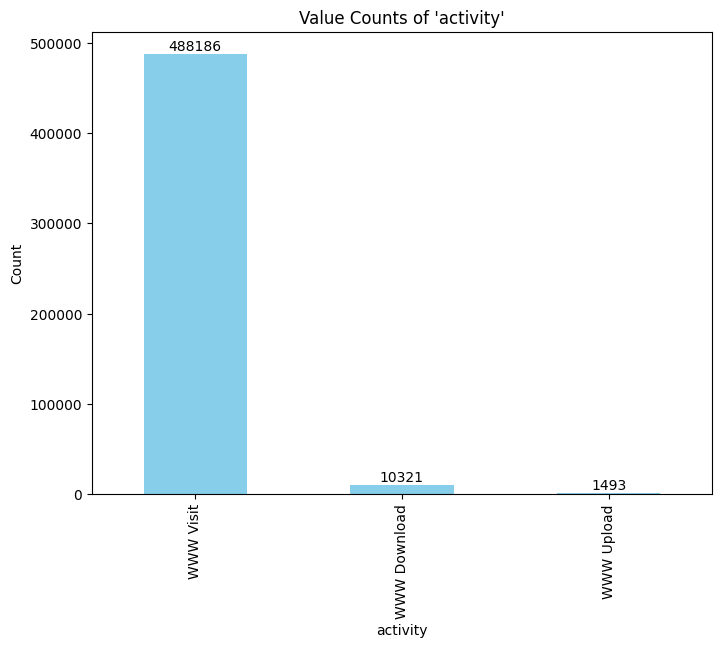

In [ ]:
plot_distribution(df_http, 'activity')

In [ ]:
df_user_http_visit = df_http[df_http['activity']=='WWW Visit']
df_user_http_download = df_http[df_http['activity']=='WWW Download']
df_user_http_upload = df_http[df_http['activity']=='WWW Upload']

In [ ]:
# groups the df_user_logon DataFrame by user, PC, and activity, counts the occurrences
df_user_http_visit__ = df_user_http_visit.groupby(['user','pc', 'activity']).count().reset_index().rename({'date':'total_visit_activity'}, axis = 1)[['user', 'total_visit_activity']]
df_user_http_download__ = df_user_http_download.groupby(['user','pc', 'activity']).count().reset_index().rename({'date':'total_download_activity'}, axis = 1)[['user', 'total_download_activity']]
df_user_http_upload__ = df_user_http_upload.groupby(['user','pc', 'activity']).count().reset_index().rename({'date':'total_upload_activity'}, axis = 1)[['user', 'total_upload_activity']]

df_user_http_upload__.head()

user  total_upload_activity
0  AAS2987                      2
1  ABD3426                      1
2  ABH0349                      1
3  ABO1173                      1
4  ACB3123                      1

In [ ]:
df_http__ = pd.merge(df_user_http_visit__, df_user_http_download__, on='user')
df_http__ = pd.merge(df_http__, df_user_http_upload__, on='user')

df_http__.head()

user  total_visit_activity  total_download_activity  \
0  ABH0349                     5                        9   
1  ABO1173                   114                        4   
2  ACB3123                   135                        3   
3  ACP2122                    91                       46   
4  ACV1946                   128                        4   

   total_upload_activity  
0                      1  
1                      1  
2                      1  
3                      6  
4                      2

In [ ]:
# merge the device data with user data
df_http__user = pd.merge(df_http__, df_user_, on='user').drop(['functional_unit',	'department'], axis = 1)
df_http__user.head()

user  total_visit_activity  total_download_activity  \
0  ACV1946                   128                        4   
1  AEH0187                    40                       79   
2  BBA1230                   145                        3   
3  BBM2604                   117                        7   
4  BBT1948                   122                        4   

   total_upload_activity  
0                      2  
1                     10  
2                      1  
3                      1  
4                      1

In [ ]:
df_email.head()

id                date     user       pc  \
0  {I1O2-B4EB49RW-7379WSQW} 2010-01-02 06:36:41  HDB1666  PC-6793   
1  {L7E7-V4UX89RR-3036ZDHU} 2010-01-02 06:40:02  HDB1666  PC-6793   
2  {S8C2-Q8YX87DJ-0516SIWZ} 2010-01-02 06:42:48  HDB1666  PC-6793   
3  {A1V9-O5BL46SW-1708NAEC} 2010-01-02 06:45:42  HDB1666  PC-6793   
4  {N6R0-M2EI82DM-5583LSUM} 2010-01-02 06:47:07  HDB1666  PC-6793   

                               to                            cc  \
0    Louis.Bernard.Garza@dtaa.com   Emery.Ali.Holloway@dtaa.com   
1    Hector.Donovan.Bray@dtaa.com                           NaN   
2  Quintessa.O.Farrell@harris.com  Hector.Donovan.Bray@dtaa.com   
3    Hector.Donovan.Bray@dtaa.com                           NaN   
4    Hector.Donovan.Bray@dtaa.com                           NaN   

                            bcc                              from activity  \
0  Hector.Donovan.Bray@dtaa.com      Hector.Donovan.Bray@dtaa.com     Send   
1                           NaN       Luke.Grant.Mcmahon@dtaa.com     View   
2                           NaN      Hector.Donovan.Bray@dtaa.com     Send   
3                           NaN       Travis.Ezra.Warner@dtaa.com     View   
4                           NaN  Kenyon.William.Delacruz@dtaa.com     View   

      size                                        attachments  \
0    45659                                                NaN   
1    34142                                                NaN   
2  1310925  C:\28X79b6\0PAGXTJ8.doc(1119253);C:\11b38g6\5M...   
3    23043                                                NaN   
4    25210                                                NaN   

                                             content  
0  Now Sylvia, the object of Aminta's desire, arr...  
1  On May 14, they picked up 44 more Iroquois at ...  
2  Sylvia is notable for its mythological Arcadia...  
3  Lanctot (1967) and Smith do not identify any s...  
4  Much like all the other large groups of prison...

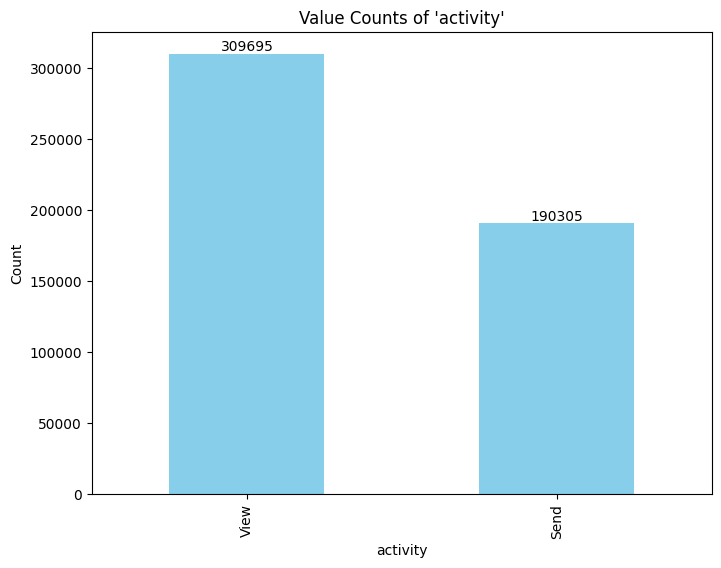

In [ ]:
plot_distribution(df_email, 'activity')

In [ ]:
df_email_send = df_email[df_email['activity']=='Send']
df_email_view = df_email[df_email['activity']=='View']

In [ ]:
# groups the df_user_logon DataFrame by user, PC, and activity, counts the occurrences
df_user_email_send = df_email_send.groupby(['user','pc', 'activity']).count().reset_index().rename({'date':'total_send_activity'}, axis = 1)[['user', 'total_send_activity']]
df_user_email_send.head()

user  total_send_activity
0  AAB0162                   53
1  AAB0398                   62
2  AAC0610                   16
3  AAC0668                   44
4  AAC3270                    7

In [ ]:
# groups the df_user_logon DataFrame by user, PC, and activity, counts the occurrences
df_user_email_view = df_email_view.groupby(['user','pc', 'activity']).count().reset_index().rename({'date':'total_view_activity'}, axis = 1)[['user', 'total_view_activity']]
df_user_email_view.head()

user  total_view_activity
0  AAB0162                   82
1  AAB0398                  112
2  AAC0610                   29
3  AAC0668                   95
4  AAC3270                    9

In [ ]:
df_mail__ = pd.merge(df_user_email_send, df_user_email_view, on='user')
df_mail__.head()

user  total_send_activity  total_view_activity
0  AAB0162                   53                   82
1  AAB0398                   62                  112
2  AAC0610                   16                   29
3  AAC0668                   44                   95
4  AAC3270                    7                    9

In [ ]:
# merge the device data with user data
df_mail__user = pd.merge(df_mail__, df_user_, on='user').drop(['functional_unit',	'department'], axis = 1)
df_mail__user.head()

user  total_send_activity  total_view_activity
0  AAB0162                   53                   82
1  AAC0610                   16                   29
2  AAC0668                   44                   95
3  AAP1919                   59                   92
4  AAP1942                   60                   79

In [ ]:
df_http_mail = pd.merge(df_http__user,df_mail__user,  on='user')
df_http_mail.head()

user  total_visit_activity  total_download_activity  \
0  ACV1946                   128                        4   
1  AEH0187                    40                       79   
2  BBA1230                   145                        3   
3  BBM2604                   117                        7   
4  BBT1948                   122                        4   

   total_upload_activity  total_send_activity  total_view_activity  
0                      2                   61                   76  
1                     10                   50                   78  
2                      1                   53                   87  
3                      1                   50                   94  
4                      1                   52                   92

In [ ]:
df_http_mail.shape

(45, 6)

In [ ]:
X2 = df_http_mail.drop('user', axis = 1).values
X2[:5]


array([[128,   4,   2,  61,  76],
       [ 40,  79,  10,  50,  78],
       [145,   3,   1,  53,  87],
       [117,   7,   1,  50,  94],
       [122,   4,   1,  52,  92]])

In [ ]:
# Train the Isolation Forest model
model_isf = IsolationForest(bootstrap=False, contamination= 0.05 , max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0).fit(X2)

# Train the One-Class SVM model
one_class_svm = OneClassSVM(nu=0.05).fit(X2)

# Train the LocalOutlierFactor model
model_lof = LocalOutlierFactor(contamination=0.1,n_neighbors=3, novelty=True).fit(X2)
print("Training Done.")
# Predict anomalies using all models
iso_forest_predictions = model_isf.predict(X2)
one_class_svm_predictions = one_class_svm.predict(X2)
lof_predictions = model_lof.predict(X2)

iso_forest_value_counts = pd.Series(iso_forest_predictions).value_counts()
one_class_svm_value_counts = pd.Series(one_class_svm_predictions).value_counts()
lof_value_counts = pd.Series(lof_predictions).value_counts()

Training Done.


In [ ]:
print("Isolation Forest Predictions Value Counts:")
print(iso_forest_value_counts)

print("\nOne-Class SVM Predictions Value Counts:")
print(one_class_svm_value_counts)

print("\nLOF Predictions Value Counts:")
print(lof_value_counts)
iso_scores = get_decision_score(model_isf, X2)
svm_scores = get_decision_score(one_class_svm, X2)
lof_scores = get_decision_score(model_lof, X2)

df_user_all = pd.DataFrame()
df_user_all['user'] = df_http_mail['user']
df_user_all['anomaly_score_ios'] = iso_scores
df_user_all['anomaly_score_One_Class_svm'] = svm_scores
df_user_all['anomaly_score_lof'] = lof_scores

df_user_all.head()

Isolation Forest Predictions Value Counts:
 1    42
-1     3
dtype: int64

One-Class SVM Predictions Value Counts:
 1    41
-1     4
dtype: int64

LOF Predictions Value Counts:
 1    43
-1     2
dtype: int64
Number of anomalies detected by IsolationForest: 3
Number of anomalies detected by OneClassSVM: 4
Number of anomalies detected by LocalOutlierFactor: 2


user  anomaly_score_ios  anomaly_score_One_Class_svm  anomaly_score_lof
0  ACV1946           0.151980                     0.016899           1.610040
1  AEH0187           0.097170                     0.033427           1.530666
2  BBA1230           0.213033                     0.006612           1.583694
3  BBM2604           0.219042                     0.043067           1.694354
4  BBT1948           0.228584                     0.030560           1.722138

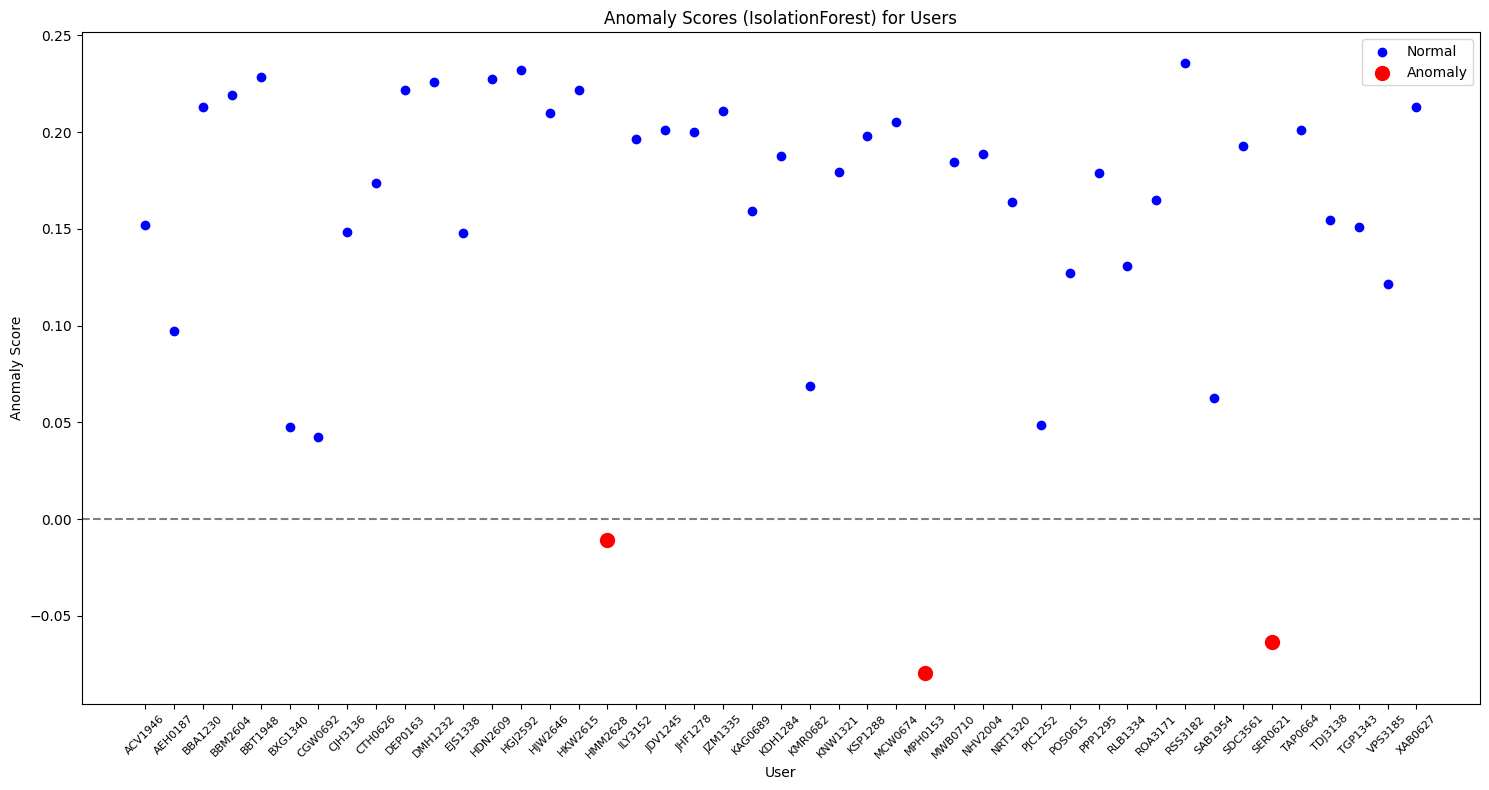

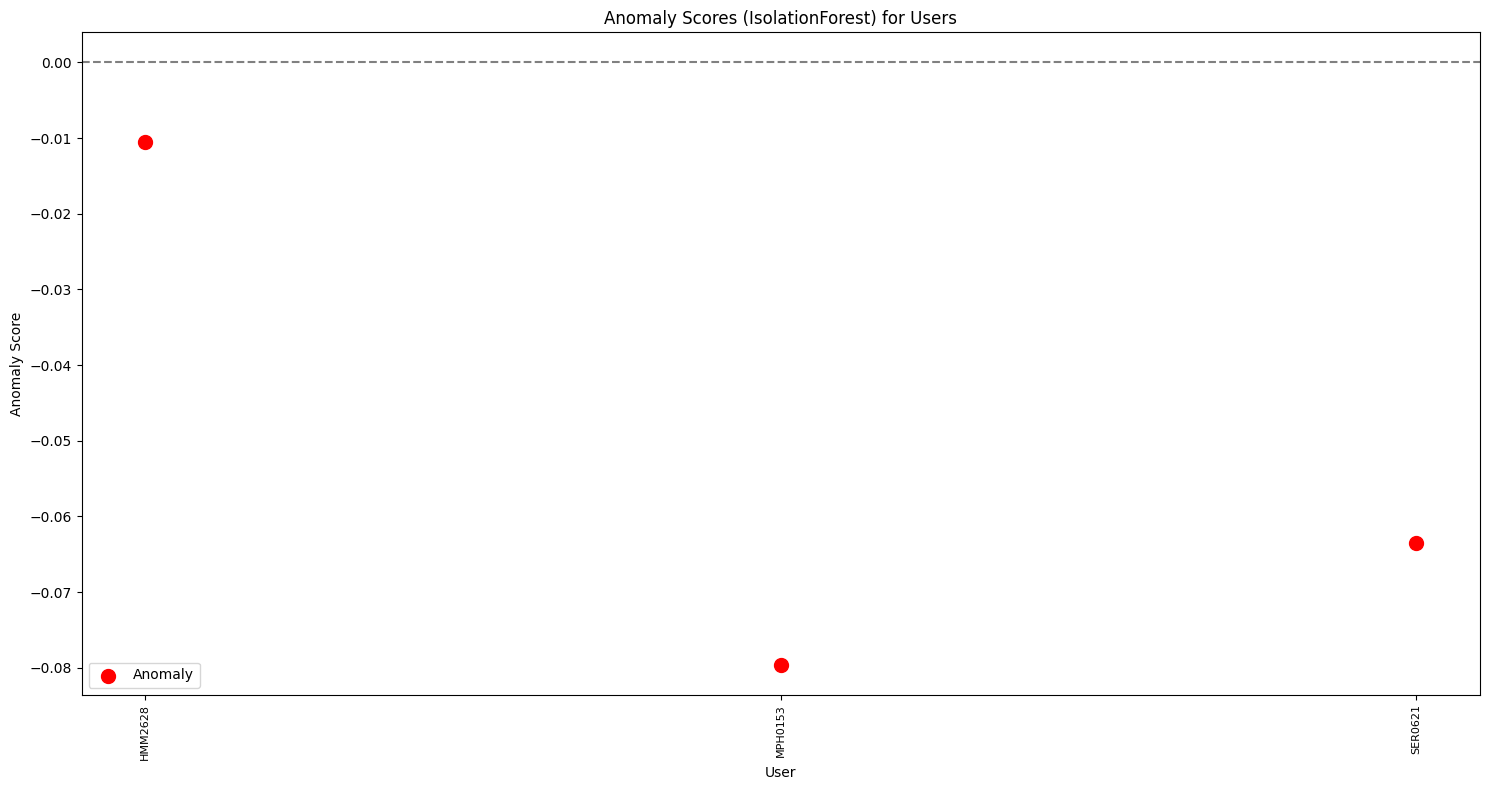

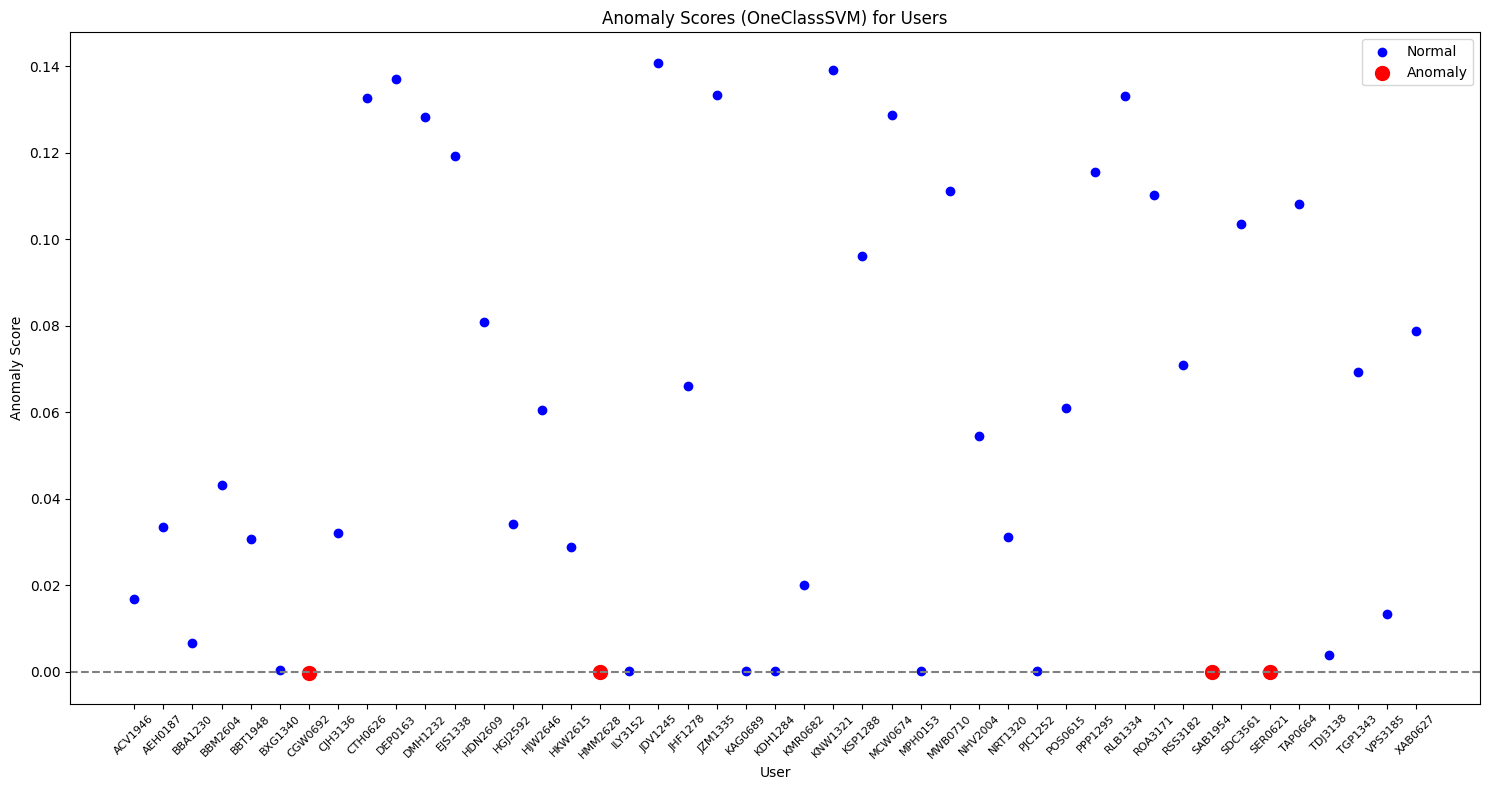

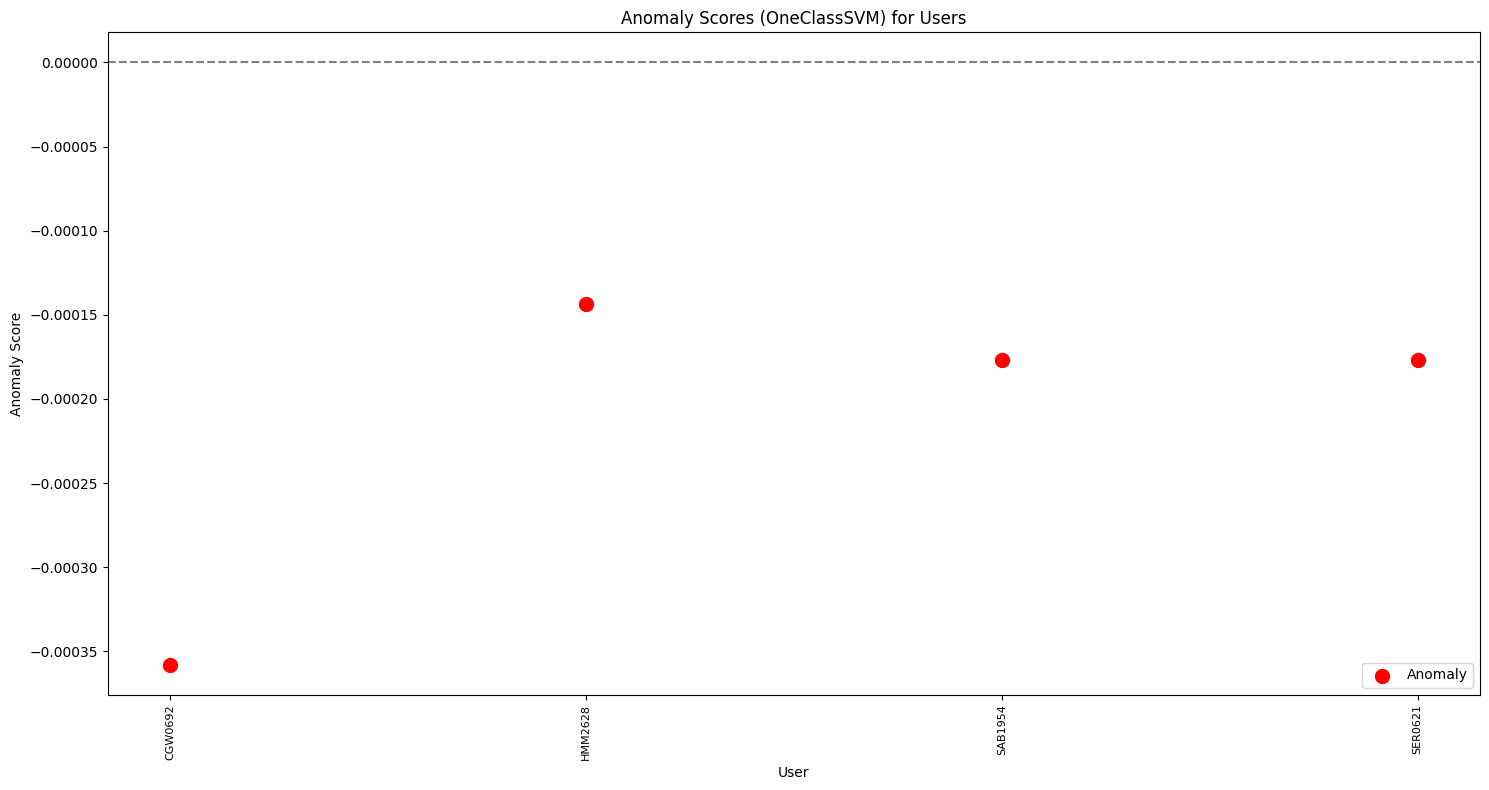

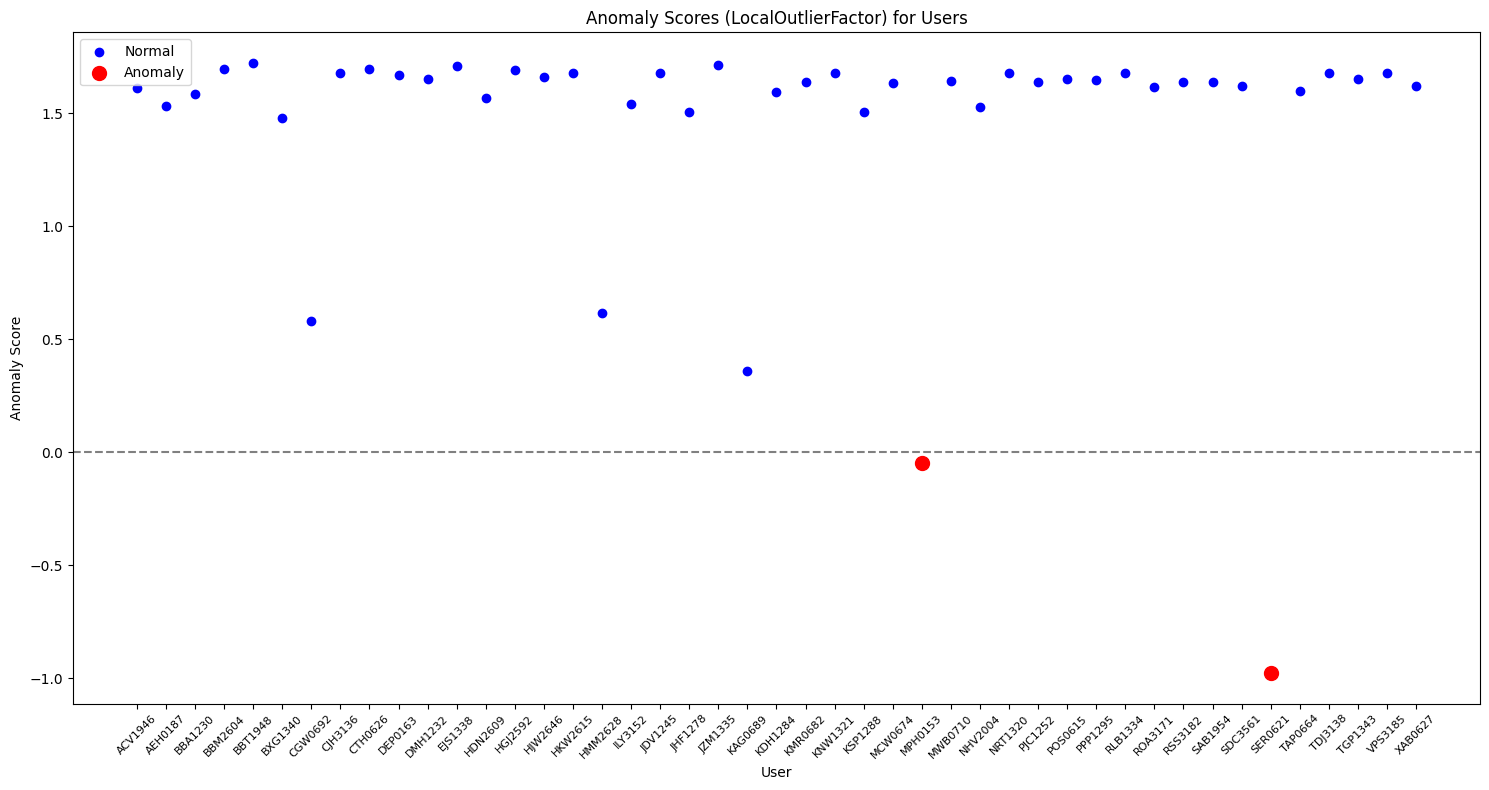

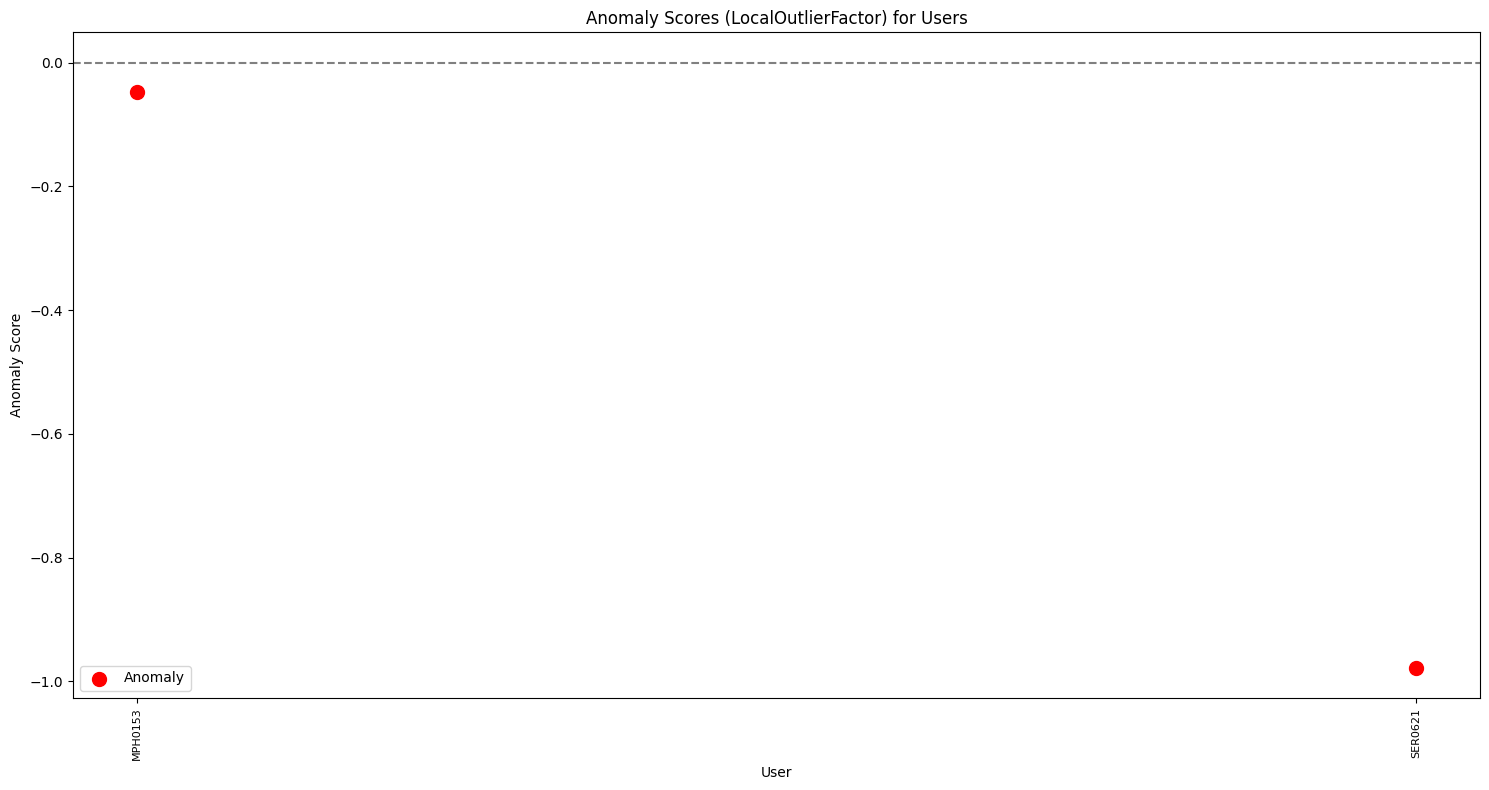

In [ ]:
plot_full_graph(df_user_all, 'anomaly_score_ios', model_isf)
plot_anomaly_graph(df_user_all, 'anomaly_score_ios', model_isf)

plot_full_graph(df_user_all, 'anomaly_score_One_Class_svm', one_class_svm)
plot_anomaly_graph(df_user_all, 'anomaly_score_One_Class_svm', one_class_svm)


plot_full_graph(df_user_all, 'anomaly_score_lof', model_lof)
plot_anomaly_graph(df_user_all, 'anomaly_score_lof', model_lof)